# Objetivo geral: 

Criar modelo de machine learning classificador para processo seletivo


# Objetivo específico:

O modelo será usado para indicar quais candidatos permanecerão na empresa ao menos 2 anos

# Limpeza de dados

In [1]:
#Importando as bibliotecas fundamentais
import numpy as np #Para manipulação matemática 
import pandas as pd #Para manipulação de data frames e series
import seaborn as sns #Para visualização gráfica
import matplotlib.pyplot as plt #Para visualização gráfica

In [2]:
#Importando dataset
rh = pd.read_excel(r'C:\Users\Usuario\OneDrive\Documentos\DS_OneDrive_Bruno\Datasets\RH.xlsx')

In [3]:
#Visualizando shape do dataframe
rh.shape

(310, 19)

In [5]:
#Buscando os títulos de colunas
rh.columns

Index(['Nome do Empregado', 'ID', 'PerfScoreID', 'Salário Mensal Corrigido',
       'Cargo', 'Data de Nascimento', 'Sexo', 'Estado Civil',
       'Data de Contratação', 'Data de Saída', 'Motivo Saída',
       'Status do Integrante', 'Departamento', 'Fonte Recrutamento',
       'Registro de Performance ', 'Pesquisa de Engajamento',
       'Índice de Satisfação', 'SpecialProjectsCount',
       'Última atualização de Performance'],
      dtype='object')

In [8]:
#Selecionando algumas colunas para análise
info_df = rh.loc[:,['Salário Mensal Corrigido', 'Cargo', 'Data de Nascimento', 'Sexo', 'Estado Civil', 'Motivo Saída',
                   'Departamento', 'Fonte Recrutamento', 'SpecialProjectsCount']]

#Visualizando shape do novo sub data frame gerado
info_df.shape

(310, 9)

In [9]:
#Visualizando o sub data frame
info_df.head()

,Salário Mensal Corrigido,Cargo,Data de Nascimento,Sexo,Estado Civil,Motivo Saída,Departamento,Fonte Recrutamento,SpecialProjectsCount
0,5060,Técnico de Produção I,1982-05-21,F,Solteiro,N/A - Empregado,Produção,Site da Empresa,0
1,3520,Técnico de Produção I,1975-12-21,M,Solteiro,N/A - Empregado,Produção,Indicação Funcionários,0
2,4400,Técnico de Produção I,1972-04-17,M,Casado(a),N/A - Empregado,Produção,Site de Vagas,0
3,3960,Técnico de Produção I,1994-10-17,M,Casado(a),N/A - Empregado,Produção,Site de Vagas,0
4,3520,Técnico de Produção I,1985-08-04,F,Solteiro,N/A - Empregado,Produção,Feira de Contratação,0


In [10]:
#Valores únicos do Salário Mensal Corrigido
np.unique(info_df['Salário Mensal Corrigido'], return_counts=True)

(array([ 3080,  3300,  3344,  3355,  3465,  3520,  3643,  3685,  3687,
         3740,  3960,  4070,  4180,  4250,  4290,  4345,  4400,  4510,
         4620,  4675,  4730,  4840,  4950,  5060,  5170,  5280,  5335,
         5350,  5390,  5400,  5445,  5500,  5720,  5742,  5806,  5940,
         6048,  6160,  6270,  6325,  6378,  6380,  6644,  6908,  7370,
         7480,  7500,  7689,  7810,  8000,  8140,  8470,  8580,  8600,
         8701,  8800,  8822,  9020,  9240,  9284,  9405,  9460,  9900,
         9992, 10000, 10250, 10340, 10472, 10500, 10560, 10670, 10802,
        10835, 11110, 11150, 11200, 11220, 11440, 11495, 11660, 11836,
        11880, 11902, 11990, 12100, 12144, 12212, 12320, 12364, 12566,
        12804, 12870, 13200, 13255, 13486, 13640, 13860, 14080, 14300,
        17600], dtype=int64),
 array([ 5, 13,  1,  1,  1, 13,  1,  1,  1, 12,  8,  1, 11,  2,  1,  2, 16,
         1, 16,  1,  1, 25,  1, 10,  1, 15,  2,  1,  1,  5,  1,  9,  8,  1,
         1,  7,  1,  5,  1,  1,  1,  

In [11]:
#Valores mínimo e máximo da variável Salário Mensal Corrigido
print('O menor salário é', info_df['Salário Mensal Corrigido'].min())
print('O maior salário é', info_df['Salário Mensal Corrigido'].max())

O menor salário é 3080
O maior salário é 17600


In [9]:
#Valores únicos da variável Cargo
np.unique(info_df['Cargo'], return_counts=True)

(array(['Analista Comercial I', 'Analista Comercial II',
        'Analista Comercial III', 'Analista de BI I', 'Analista de BI II',
        'Analista de Dados I', 'Analista de Dados II',
        'Analista de Dados III', 'Analista de Suporte de TI',
        'Assistente Administrativo', 'Auxiliar de Suporte de TI',
        'Contador I', 'Contador II', 'Diretor Administrativo',
        'Diretor Comercial', 'Diretor de Produção', 'Diretor de TI',
        'Engenheiro de Software', 'Engenheiro de Software II',
        'Gerente  de TI', 'Gerente Administrativo', 'Gerente Comercial',
        'Gerente de BI', 'Gerente de Eng. Software', 'Gerente de Produção',
        'Gerente de TI', 'Técnico de Produção I', 'Técnico de Produção II'],
       dtype=object),
 array([  9,  11,   7,   4,   3,   2,   2,   6,  13,   3,   1,   3,   2,
          1,   1,   1,   1,  14,   5,   3,   2,   3,   1,   1,  14,   4,
        136,  57], dtype=int64))

In [10]:
#Valores únicos da variável Data de Nascimento
np.unique(info_df['Data de Nascimento'], return_counts=True) #Range do ano de nascimento

(array(['1956-01-31T00:00:00.000000000', '1956-02-24T00:00:00.000000000',
        '1957-01-16T00:00:00.000000000', '1957-08-17T00:00:00.000000000',
        '1957-11-01T00:00:00.000000000', '1958-05-23T00:00:00.000000000',
        '1959-09-20T00:00:00.000000000', '1959-12-09T00:00:00.000000000',
        '1960-04-12T00:00:00.000000000', '1960-11-12T00:00:00.000000000',
        '1963-07-10T00:00:00.000000000', '1963-12-26T00:00:00.000000000',
        '1964-08-17T00:00:00.000000000', '1966-06-18T00:00:00.000000000',
        '1968-05-13T00:00:00.000000000', '1968-08-26T00:00:00.000000000',
        '1968-10-28T00:00:00.000000000', '1969-01-04T00:00:00.000000000',
        '1969-03-31T00:00:00.000000000', '1969-04-12T00:00:00.000000000',
        '1969-07-29T00:00:00.000000000', '1969-12-09T00:00:00.000000000',
        '1970-02-01T00:00:00.000000000', '1970-07-04T00:00:00.000000000',
        '1970-09-04T00:00:00.000000000', '1970-09-08T00:00:00.000000000',
        '1971-03-16T00:00:00.000000000

In [12]:
#Data para: última contratação, demissão e atualização de performance
print('Data da contratação mais recente',rh['Data de Contratação'].max())
print('Data da demissão mais recente', rh['Data de Saída'].max())
print('Data da atualização de performance mais recente', rh['Última atualização de Performance'].max())

Data da contratação mais recente 2019-08-05 00:00:00
Data da demissão mais recente 2019-08-02 00:00:00
Data da atualização de performance mais recente 2016-12-01 00:00:00


In [19]:
#Criando a coluna idade
info_df ['idade'] = 2019 - info_df['Data de Nascimento'].dt.year

In [20]:
#Resultado
info_df.head()

,Salário Mensal Corrigido,Cargo,Data de Nascimento,Sexo,Estado Civil,Motivo Saída,Departamento,Fonte Recrutamento,SpecialProjectsCount,idade
0,5060,Técnico de Produção I,1982-05-21,F,Solteiro,N/A - Empregado,Produção,Site da Empresa,0,37
1,3520,Técnico de Produção I,1975-12-21,M,Solteiro,N/A - Empregado,Produção,Indicação Funcionários,0,44
2,4400,Técnico de Produção I,1972-04-17,M,Casado(a),N/A - Empregado,Produção,Site de Vagas,0,47
3,3960,Técnico de Produção I,1994-10-17,M,Casado(a),N/A - Empregado,Produção,Site de Vagas,0,25
4,3520,Técnico de Produção I,1985-08-04,F,Solteiro,N/A - Empregado,Produção,Feira de Contratação,0,34


In [21]:
#Valores únicos para idade
np.unique(info_df['idade'], return_counts=True)

(array([22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
        39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 55, 56, 59,
        60, 61, 62, 63], dtype=int64),
 array([ 3,  3,  5, 14, 17, 19, 21, 13, 16, 21,  8, 14,  9, 19,  8, 11,  9,
         9, 12,  9,  7,  2, 12,  7,  7,  4,  4,  5,  5,  3,  1,  1,  2,  2,
         2,  1,  3,  2], dtype=int64))

In [22]:
#Tipo de dado da coluna idade
info_df['idade'].dtype

dtype('int64')

In [23]:
#Valores únicos da coluna Sexo
np.unique(info_df['Sexo'])

array(['F', 'M'], dtype=object)

In [24]:
#Valores únicos da coluna Estado Civil
np.unique(info_df['Estado Civil'])

array(['Casado(a)', 'Solteiro'], dtype=object)

In [25]:
#Valores únicos da da coluna Motivo Saída
np.unique(info_df['Motivo Saída'])

array(['Abandono', 'Excesso de Faltas', 'Infeliz', 'Mal comportamento',
       'Mudança de Carreira', 'N/A - Empregado', 'Performance',
       'Proposta do Concorrente'], dtype=object)

In [26]:
#Valores únicos da coluna Departamento
np.unique(info_df['Departamento'])

array(['Administrativo', 'Produção', 'TI', 'Vendas'], dtype=object)

In [27]:
#Valores únicos da Fonte Recrutamento
np.unique(info_df['Fonte Recrutamento'])

array(['Feira de Contratação', 'Indicação Funcionários',
       'Site da Empresa', 'Site de Vagas'], dtype=object)

In [28]:
#Valores únicos da coluna Special projects count
np.unique(info_df['SpecialProjectsCount'])

array([0, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [29]:
#Buscando quantidade de ausência de valores
info_df.isnull().sum()

Salário Mensal Corrigido    0
Cargo                       0
Data de Nascimento          0
Sexo                        0
Estado Civil                0
Motivo Saída                0
Departamento                0
Fonte Recrutamento          0
SpecialProjectsCount        0
idade                       0
dtype: int64

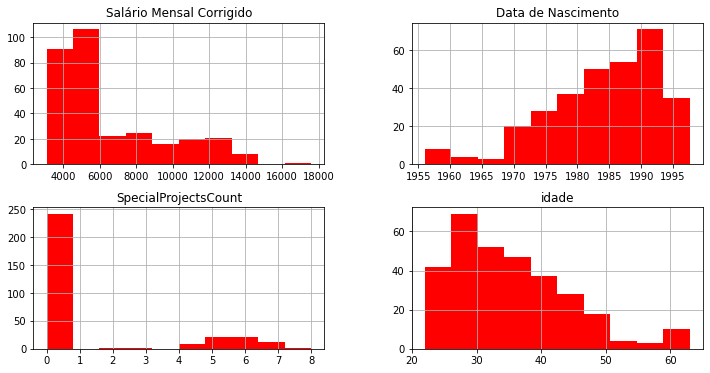

In [47]:
#Buscando valores negativos
info_df.hist(color='red', figsize=(12,6));

In [31]:
#Informações estruturais
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Salário Mensal Corrigido  310 non-null    int64         
 1   Cargo                     310 non-null    object        
 2   Data de Nascimento        310 non-null    datetime64[ns]
 3   Sexo                      310 non-null    object        
 4   Estado Civil              310 non-null    object        
 5   Motivo Saída              310 non-null    object        
 6   Departamento              310 non-null    object        
 7   Fonte Recrutamento        310 non-null    object        
 8   SpecialProjectsCount      310 non-null    int64         
 9   idade                     310 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 24.3+ KB


In [44]:
#Valores únicos para ID
np.unique(rh['ID'], return_counts=True)[1] #Buscando repetição - inconsistência

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


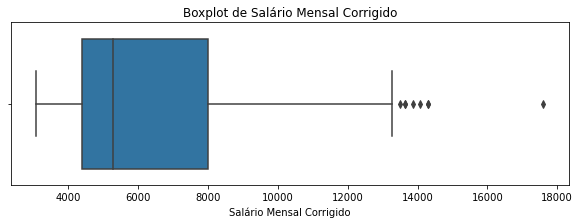

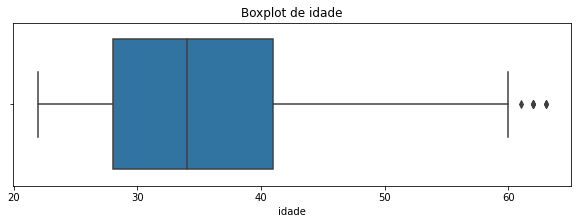

In [34]:
#Gerindo outliers indesejados
#Prolando boxplot para análise de outliers
cols = ['Salário Mensal Corrigido', 'idade']
for col in cols:
    plt.figure(figsize=(10,3))
    sns.boxplot(info_df[col])
    plt.title('Boxplot de {}'.format(col));

In [35]:
#Exibindo quantidade de salários acima de R$ 13000
info_df[info_df['Salário Mensal Corrigido'] > 13000].shape

(11, 10)

In [36]:
#Percentual representativo
print(round((11 * 100)/info_df.shape[0], 2),'%')

3.55 %


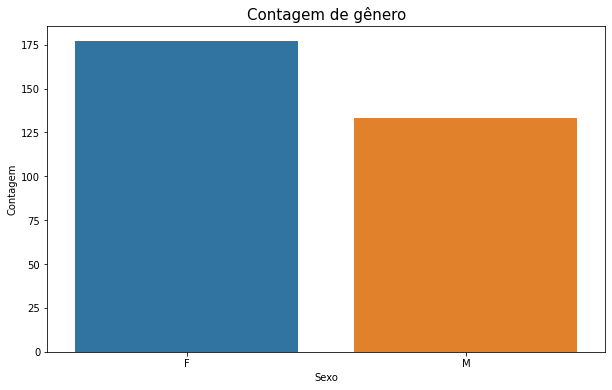

In [43]:
#Gerando gráfico de contagem de gênero
plt.figure(figsize=(10,6))
sns.countplot(info_df['Sexo'])
plt.ylabel('Contagem')
plt.title('Contagem de gênero', fontsize=15);

In [38]:
#Buscando intervalos de frequência e quantidade de classes
frequencies, classes = np.histogram(info_df['idade'], bins='sturges')
frequencies, classes, len(classes)

(array([42, 69, 52, 47, 37, 28, 18,  4,  3, 10], dtype=int64),
 array([22. , 26.1, 30.2, 34.3, 38.4, 42.5, 46.6, 50.7, 54.8, 58.9, 63. ]),
 11)

In [39]:
#Criando faixa etária e aplicando em data frame
info_df['Faixa Etária'] = pd.cut(info_df['idade'], bins=[18, 25, 30, 35, 40, 45, 50, 55, 60, 65],
                                 labels=['18-25', '25-30', '30-35', '35-40', '40-45', '45-50',
                                        '50-55', '55-60', '60-65'])

In [40]:
#Visualizando resultado
info_df.head()

,Salário Mensal Corrigido,Cargo,Data de Nascimento,Sexo,Estado Civil,Motivo Saída,Departamento,Fonte Recrutamento,SpecialProjectsCount,idade,Faixa Etária
0,5060,Técnico de Produção I,1982-05-21,F,Solteiro,N/A - Empregado,Produção,Site da Empresa,0,37,35-40
1,3520,Técnico de Produção I,1975-12-21,M,Solteiro,N/A - Empregado,Produção,Indicação Funcionários,0,44,40-45
2,4400,Técnico de Produção I,1972-04-17,M,Casado(a),N/A - Empregado,Produção,Site de Vagas,0,47,45-50
3,3960,Técnico de Produção I,1994-10-17,M,Casado(a),N/A - Empregado,Produção,Site de Vagas,0,25,18-25
4,3520,Técnico de Produção I,1985-08-04,F,Solteiro,N/A - Empregado,Produção,Feira de Contratação,0,34,30-35


In [90]:
#Analisando estrutura dos dados após crianção da coluna Faixa Etária
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Salário Mensal Corrigido  310 non-null    int64         
 1   Cargo                     310 non-null    object        
 2   Data de Nascimento        310 non-null    datetime64[ns]
 3   Sexo                      310 non-null    object        
 4   Estado Civil              310 non-null    object        
 5   Motivo Saída              310 non-null    object        
 6   Departamento              310 non-null    object        
 7   Fonte Recrutamento        310 non-null    object        
 8   SpecialProjectsCount      310 non-null    int64         
 9   idade                     310 non-null    int64         
 10  Faixa Etária              310 non-null    category      
dtypes: category(1), datetime64[ns](1), int64(3), object(6)
memory usage: 25.0+ KB


# Análise exploratória

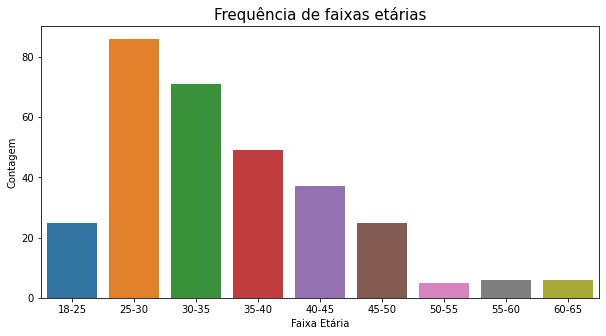

In [42]:
#Frequência de faixas etárias
plt.figure(figsize=(10,5))
sns.countplot(info_df['Faixa Etária'])
plt.ylabel('Contagem')
plt.title('Frequência de faixas etárias', fontsize=15);

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


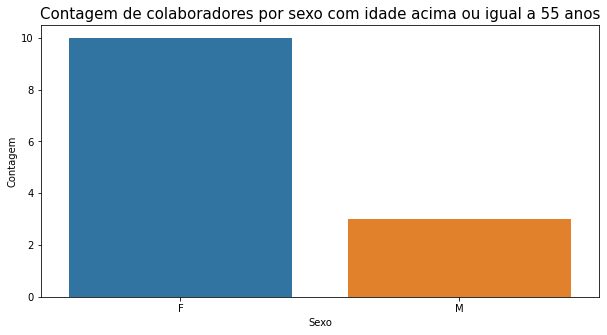

In [46]:
#Contagem de colaboradores com idade acima ou igual a 55 anos em função do gênero
plt.figure(figsize=(10,5))
sns.countplot(info_df[info_df['idade'] >= 55]['Sexo'])
plt.ylabel('Contagem')
plt.title('Contagem de colaboradores por sexo com idade acima ou igual a 55 anos', fontsize=15);

In [36]:
#Resumo estatístico básico
info_df.describe()

,Salário Mensal Corrigido,SpecialProjectsCount,idade
count,310.000000,310.000000,310.00000
mean,6446.751613,1.209677,35.43871
std,2995.616465,2.352009,8.86839
min,3080.000000,0.000000,22.00000
25%,4400.000000,0.000000,28.00000
50%,5280.000000,0.000000,34.00000
75%,8000.000000,0.000000,41.00000
max,17600.000000,8.000000,63.00000


In [38]:
hr['Data de Contratação'].min(), hr['Data de Contratação'].max()

(Timestamp('2009-08-31 00:00:00'), Timestamp('2019-08-05 00:00:00'))

In [39]:
hr['Data de Saída'].min(), hr['Data de Saída'].max()

(Timestamp('2016-01-04 00:00:00'), Timestamp('2019-08-02 00:00:00'))

In [48]:
#Separando motivos de demissão
empregado_df = info_df[info_df['Motivo Saída'] == 'N/A - Empregado']
abandono_df = info_df[info_df['Motivo Saída'] == 'Abandono']
falta_df = info_df[info_df['Motivo Saída'] == 'Excesso de Faltas']
infeliz_df = info_df[info_df['Motivo Saída'] == 'Infeliz']
comportamento_df = info_df[info_df['Motivo Saída'] == 'Mal Comportamento']
mudanca_df = info_df[info_df['Motivo Saída'] == 'Mudança de Carreira']
performance_df = info_df[info_df['Motivo Saída'] == 'Performance']
competidor_df = info_df[info_df['Motivo Saída'] == 'Proposta do Concorrente']

In [50]:
#Separando dataset entre empregados e demitidos
empregado_df = info_df[info_df['Motivo Saída'] == 'N/A - Empregado']
demitido_df = info_df[info_df['Motivo Saída'] != 'N/A - Empregado']

In [51]:
#Estatísticas básicas sobre grupo de demitidos
demitido_df.describe()

,Salário Mensal Corrigido,SpecialProjectsCount,idade
count,103.000000,103.000000,103.000000
mean,5879.834951,0.737864,36.660194
std,2620.412155,1.857476,9.759413
min,3080.000000,0.000000,23.000000
25%,4180.000000,0.000000,29.000000
50%,4840.000000,0.000000,35.000000
75%,6380.000000,0.000000,42.000000
max,13640.000000,7.000000,63.000000


In [53]:
#Empregados que apresentaram 8 projetos
empregado_df[empregado_df['SpecialProjectsCount'] == 8]

,Salário Mensal Corrigido,Cargo,Data de Nascimento,Sexo,Estado Civil,Motivo Saída,Departamento,Fonte Recrutamento,SpecialProjectsCount,idade,Faixa Etária
202,11902,Engenheiro de Software II,1957-01-16,F,Casado(a),N/A - Empregado,TI,Indicação Funcionários,8,62,60-65
206,12144,Engenheiro de Software II,1983-02-04,F,Solteiro,N/A - Empregado,TI,Indicação Funcionários,8,36,35-40


In [46]:
#Empregados que recebem R$ 17.600
employeed_df[employeed_df['Salário Mensal Corrigido'] == 17600]

,Salário Mensal Corrigido,Cargo,Data de Nascimento,Sexo,Estado Civil,Motivo Saída,Departamento,Fonte Recrutamento,SpecialProjectsCount,idade,Faixa Etária
110,17600,Diretor Administrativo,1959-09-20,F,Casado(a),N/A - Empregado,Administrativo,Site de Vagas,0,60,55-60


C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


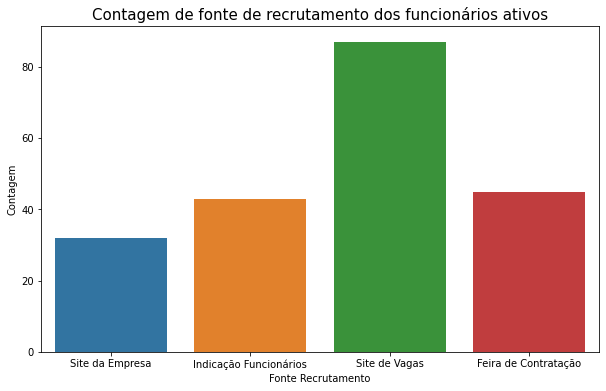

In [55]:
#Gerando gráfico de contagem para fonte de recrutamento dos funcionários ativos na empresa
plt.figure(figsize=(10,6))
sns.countplot(empregado_df['Fonte Recrutamento'])
plt.title("Contagem de fonte de recrutamento dos funcionários ativos", fontsize=15)
plt.ylabel('Contagem');

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


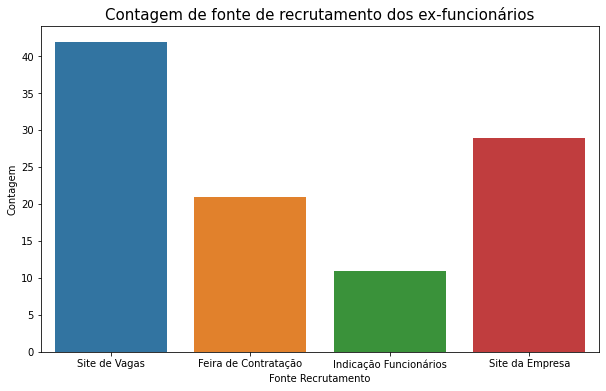

In [57]:
#Gerando gráfico de contagem de fonte de recrutamento para ex-funcionários
plt.figure(figsize=(10,6))
sns.countplot(demitido_df['Fonte Recrutamento'])
plt.title("Contagem de fonte de recrutamento dos ex-funcionários", fontsize=15)
plt.ylabel('Contagem');

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


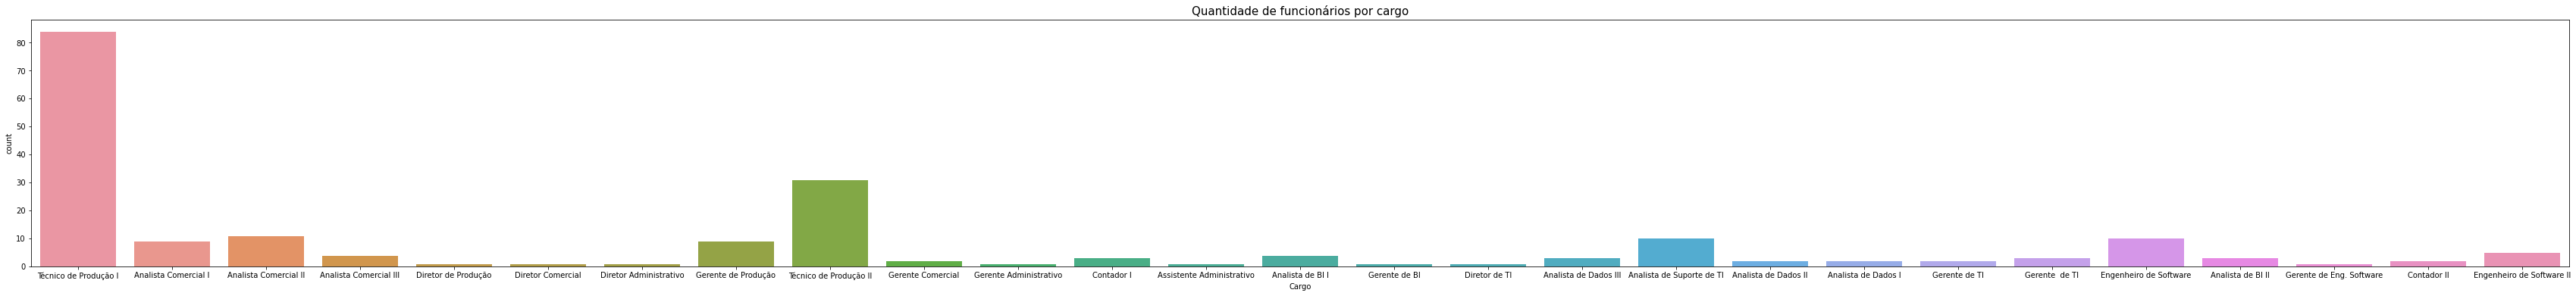

In [60]:
#Contagem de ocupação por cargo
plt.figure(figsize=(60,6))
sns.countplot(empregado_df['Cargo'])
plt.title("Quantidade de funcionários por cargo", fontsize=15);

In [61]:
#Resumo estatístico - I Production technician
empregado_df[empregado_df['Cargo'] == 'Técnico de Produção I'].describe() 

,Salário Mensal Corrigido,SpecialProjectsCount,idade
count,84.000000,84.0,84.000000
mean,4225.071429,0.0,36.000000
std,658.119167,0.0,7.950146
min,3080.000000,0.0,22.000000
25%,3643.750000,0.0,30.000000
50%,4372.500000,0.0,35.000000
75%,4840.000000,0.0,40.000000
max,5445.000000,0.0,63.000000


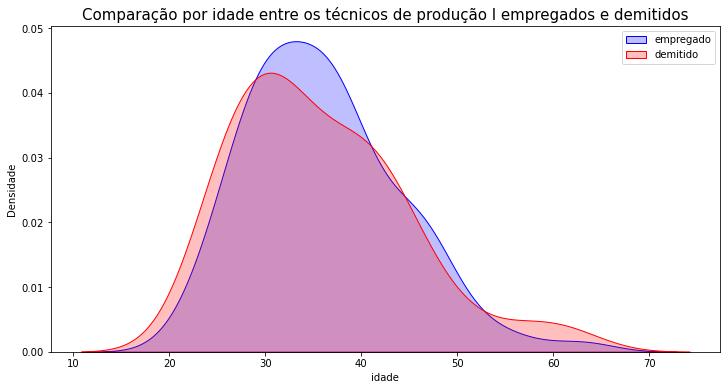

In [65]:
#Gerando gráfico de comparação por idade entre técnicos de produção (I) empregados e demitidos
plt.figure(figsize=(12, 6))
sns.kdeplot(empregado_df[empregado_df['Cargo'] == 'Técnico de Produção I']['idade'], shade=True, color='blue', label='empregado')
sns.kdeplot(demitido_df[demitido_df['Cargo'] == 'Técnico de Produção I']['idade'], shade=True, color='red', label='demitido')
plt.legend()
plt.title('Comparação por idade entre os técnicos de produção I empregados e demitidos', fontsize=15)
plt.ylabel('Densidade');

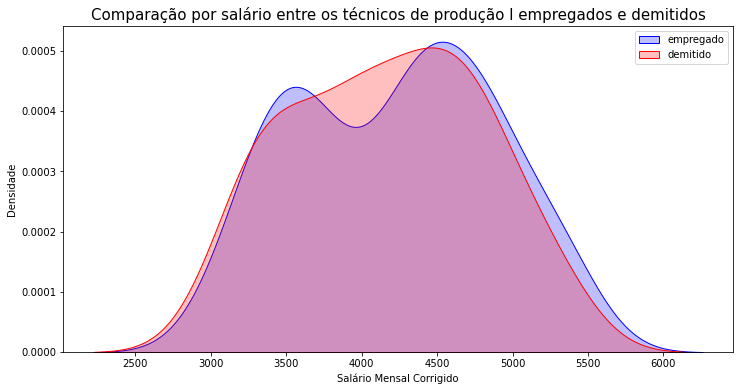

In [66]:
#Gerando gráfico de comparação por salário entre técnicos de produção (I) empregados e demitidos
plt.figure(figsize=(12, 6))
sns.kdeplot(empregado_df[empregado_df['Cargo'] == 'Técnico de Produção I']['Salário Mensal Corrigido'], shade=True, color='blue', label='empregado')
sns.kdeplot(demitido_df[demitido_df['Cargo'] == 'Técnico de Produção I']['Salário Mensal Corrigido'], shade=True, color='red', label='demitido')
plt.legend()
plt.title('Comparação por salário entre os técnicos de produção I empregados e demitidos', fontsize=15)
plt.ylabel('Densidade');

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


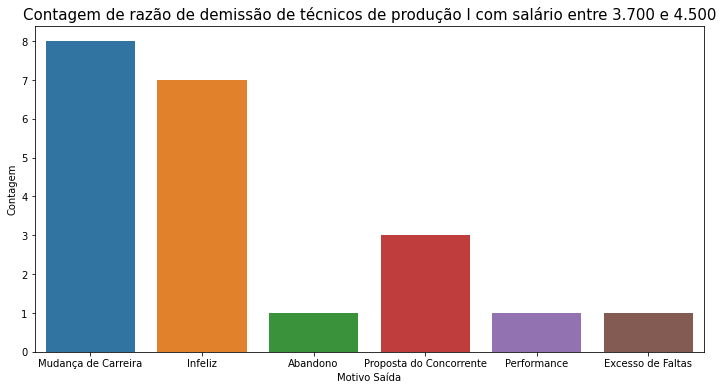

In [70]:
#Gerando gráfico para contagem de razão de demissão de técnicos de produção I com salário entre R$ 3.700 e R$ 4.500
plt.figure(figsize=(12, 6))
sns.countplot(demitido_df[demitido_df['Cargo'] == 'Técnico de Produção I']['Motivo Saída'][demitido_df['Salário Mensal Corrigido'] > 3700][demitido_df['Salário Mensal Corrigido'] < 4500])
plt.title('Contagem de razão de demissão de técnicos de produção I com salário entre 3.700 e 4.500', fontsize=15)
plt.ylabel('Contagem');

In [71]:
#Estatísticas sobre os técnicos I empregados com idade acima de 29 e abaixo 42 anos
empregado_df[empregado_df['Cargo'] == 'Técnico de Produção I'][empregado_df['idade'] > 29][empregado_df['idade'] < 42].describe()

<ipython-input-71-7b2727f4f568>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  empregado_df[empregado_df['Cargo'] == 'Técnico de Produção I'][empregado_df['idade'] > 29][empregado_df['idade'] < 42].describe()
<ipython-input-71-7b2727f4f568>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  empregado_df[empregado_df['Cargo'] == 'Técnico de Produção I'][empregado_df['idade'] > 29][empregado_df['idade'] < 42].describe()


,Salário Mensal Corrigido,SpecialProjectsCount,idade
count,47.000000,47.0,47.000000
mean,4255.872340,0.0,35.191489
std,680.261446,0.0,3.366318
min,3080.000000,0.0,30.000000
25%,3713.500000,0.0,32.000000
50%,4400.000000,0.0,35.000000
75%,4840.000000,0.0,37.500000
max,5445.000000,0.0,41.000000


In [73]:
#Estatísticas sobre os técnicos I demitidos com idade acima de 29 e abaixo de 42 anos 
demitido_df[demitido_df['Cargo'] == 'Técnico de Produção I'][demitido_df['idade'] > 29][demitido_df['idade'] < 42].describe()

<ipython-input-73-ba3b97891527>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  demitido_df[demitido_df['Cargo'] == 'Técnico de Produção I'][demitido_df['idade'] > 29][demitido_df['idade'] < 42].describe()
<ipython-input-73-ba3b97891527>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  demitido_df[demitido_df['Cargo'] == 'Técnico de Produção I'][demitido_df['idade'] > 29][demitido_df['idade'] < 42].describe()


,Salário Mensal Corrigido,SpecialProjectsCount,idade
count,27.000000,27.0,27.000000
mean,4149.444444,0.0,35.333333
std,651.543040,0.0,3.980723
min,3080.000000,0.0,30.000000
25%,3547.500000,0.0,31.500000
50%,4180.000000,0.0,35.000000
75%,4620.000000,0.0,40.000000
max,5280.000000,0.0,41.000000


In [74]:
#Estatísticas sobre os técnicos I empregados com salário acima de 3700 e abaixo de 4500
empregado_df[empregado_df['Cargo'] == 'Técnico de Produção I'][empregado_df['Salário Mensal Corrigido'] > 3700][empregado_df['Salário Mensal Corrigido'] < 4500].describe()

<ipython-input-74-a7a2692f903c>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  empregado_df[empregado_df['Cargo'] == 'Técnico de Produção I'][empregado_df['Salário Mensal Corrigido'] > 3700][empregado_df['Salário Mensal Corrigido'] < 4500].describe()
<ipython-input-74-a7a2692f903c>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  empregado_df[empregado_df['Cargo'] == 'Técnico de Produção I'][empregado_df['Salário Mensal Corrigido'] > 3700][empregado_df['Salário Mensal Corrigido'] < 4500].describe()


,Salário Mensal Corrigido,SpecialProjectsCount,idade
count,30.000000,30.0,30.000000
mean,4137.833333,0.0,34.500000
std,273.166879,0.0,7.219466
min,3740.000000,0.0,22.000000
25%,3795.000000,0.0,29.000000
50%,4180.000000,0.0,33.500000
75%,4400.000000,0.0,39.750000
max,4400.000000,0.0,50.000000


In [76]:
#Estatísticas sobre os técnicos I demitidos com salário acima de 3700 e abaixo de 4500
demitido_df[demitido_df['Cargo'] == 'Técnico de Produção I'][demitido_df['Salário Mensal Corrigido'] > 3700][demitido_df['Salário Mensal Corrigido'] > 4500].describe()

<ipython-input-76-c9aa3003aafb>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  demitido_df[demitido_df['Cargo'] == 'Técnico de Produção I'][demitido_df['Salário Mensal Corrigido'] > 3700][demitido_df['Salário Mensal Corrigido'] > 4500].describe()
<ipython-input-76-c9aa3003aafb>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  demitido_df[demitido_df['Cargo'] == 'Técnico de Produção I'][demitido_df['Salário Mensal Corrigido'] > 3700][demitido_df['Salário Mensal Corrigido'] > 4500].describe()


,Salário Mensal Corrigido,SpecialProjectsCount,idade
count,18.000000,18.0,18.000000
mean,4858.333333,0.0,35.388889
std,250.980430,0.0,7.130208
min,4620.000000,0.0,26.000000
25%,4620.000000,0.0,28.500000
50%,4840.000000,0.0,34.500000
75%,5005.000000,0.0,40.750000
max,5280.000000,0.0,49.000000


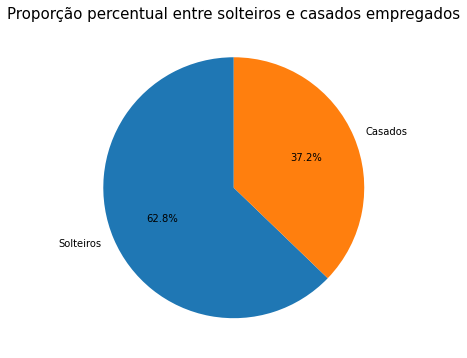

In [58]:
#Criando área de plotagem
fig, ax = plt.subplots(figsize=(6,6))

#Gerando gráfico de pizza
ax.pie([len(empregado_df[empregado_df['Estado Civil'] == 'Solteiro']), len(empregado_df[empregado_df['Estado Civil'] == 'Casado(a)'])],
       autopct='%1.1f%%', startangle=90, labels=['Solteiros', 'Casados'])
plt.title('Proporção percentual entre solteiros e casados empregados', fontsize=15);

In [59]:
#Quantidade de empregados solteiros
len(employeed_df[employeed_df['Estado Civil'] == 'Solteiro'])

130

In [60]:
#Quantidade de empregados casados
employeed_df[employeed_df['Estado Civil'] == 'Casado(a)'].shape[0]

77

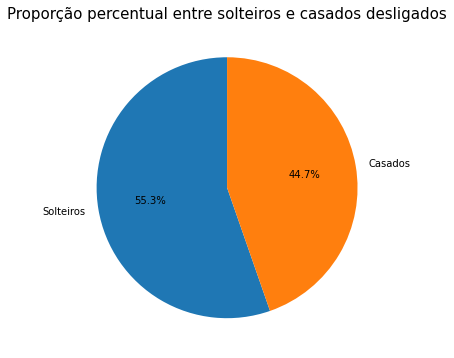

In [78]:
#Criando área de plotagem
fig, ax = plt.subplots(figsize=(6,6))

#Criando gráfico de pizza
ax.pie([len(demitido_df[demitido_df['Estado Civil'] == 'Solteiro']), len(demitido_df[demitido_df['Estado Civil'] == 'Casado(a)'])],
       autopct='%1.1f%%', startangle=90, labels=['Solteiros', 'Casados'])
plt.title('Proporção percentual entre solteiros e casados desligados', fontsize=15);

In [62]:
#Quantidade de demitidos casados
demitido_df[demitido_df['Estado Civil'] == 'Casado(a)'].shape[0]

46

In [80]:
#Quantidade de demitidos solterios
demitido_df[demitido_df['Estado Civil'] == 'Solteiro'].shape[0]

57

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


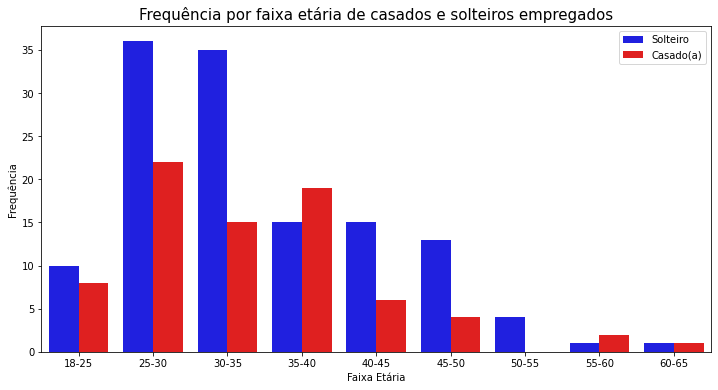

In [81]:
#Gerando gráfico de frequência de estado civil de empregados por faixa etária
plt.figure(figsize=(12,6))
sns.countplot(empregado_df['Faixa Etária'], hue=empregado_df['Estado Civil'], palette=['blue', 'red'])
plt.title('Frequência por faixa etária de casados e solteiros empregados', fontsize=15)
plt.ylabel('Frequência')
plt.legend();

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


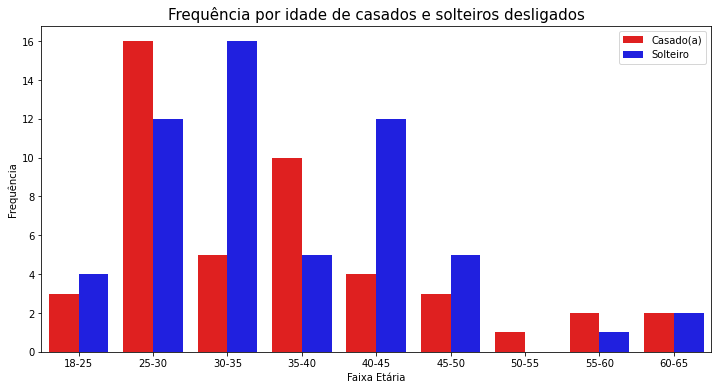

In [82]:
#Gerando gráfico de frequência de estado civil de demitidos por faixa etária
plt.figure(figsize=(12,6))
sns.countplot(demitido_df['Faixa Etária'], hue=demitido_df['Estado Civil'], palette=['red', 'blue'])
plt.title('Frequência por idade de casados e solteiros desligados', fontsize=15)
plt.ylabel('Frequência')
plt.legend();

In [83]:
#Contagem de empregados
empregado_df.shape[0]

207

In [84]:
#Contagem de demitidos
demitido_df.shape[0]

103

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


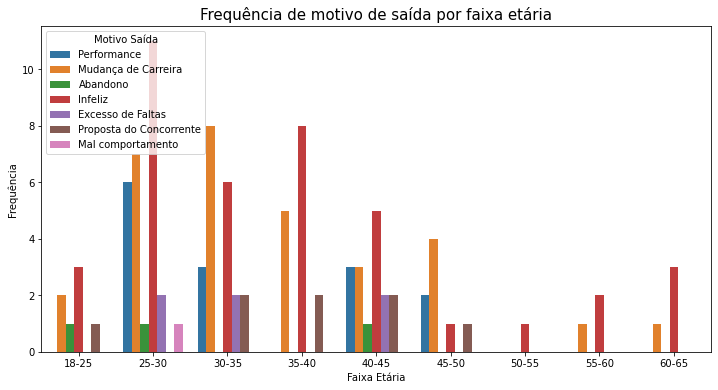

In [85]:
#Gerando gráfico de frequência de motido de saída por faixa etária
plt.figure(figsize=(12,6))
sns.countplot(demitido_df['Faixa Etária'], hue=demitido_df['Motivo Saída'])
plt.title('Frequência de motivo de saída por faixa etária', fontsize=15)
plt.ylabel('Frequência');

In [69]:
#Buscando informações de ex-funcionários que se enquadram na faixa etária 30-35 - Analisando
dmitido_df[demitido_df['Faixa Etária'] == '30-35'][demitido_df['Estado Civil'] == 'Casado(a)']

<ipython-input-69-686be93aeaae>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  laidoff_df[laidoff_df['Faixa Etária'] == '30-35'][laidoff_df['Estado Civil'] == 'Casado(a)']


,Salário Mensal Corrigido,Cargo,Data de Nascimento,Sexo,Estado Civil,Motivo Saída,Departamento,Fonte Recrutamento,SpecialProjectsCount,idade,Faixa Etária
235,4840,Técnico de Produção I,1988-03-26,M,Casado(a),Infeliz,Produção,Indicação Funcionários,0,31,30-35
248,3960,Técnico de Produção I,1984-01-04,F,Casado(a),Proposta do Concorrente,Produção,Site da Empresa,0,35,30-35
270,3355,Técnico de Produção I,1986-03-25,F,Casado(a),Infeliz,Produção,Site de Vagas,0,33,30-35
289,5500,Técnico de Produção II,1986-08-30,F,Casado(a),Infeliz,Produção,Indicação Funcionários,0,33,30-35
300,5280,Técnico de Produção II,1988-08-09,F,Casado(a),Mudança de Carreira,Produção,Indicação Funcionários,0,31,30-35


<ipython-input-87-df74d5f7a675>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.countplot(demitido_df[demitido_df['Faixa Etária'] == '25-30'][demitido_df['Estado Civil'] == 'Solteiro']['Motivo Saída'])
C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


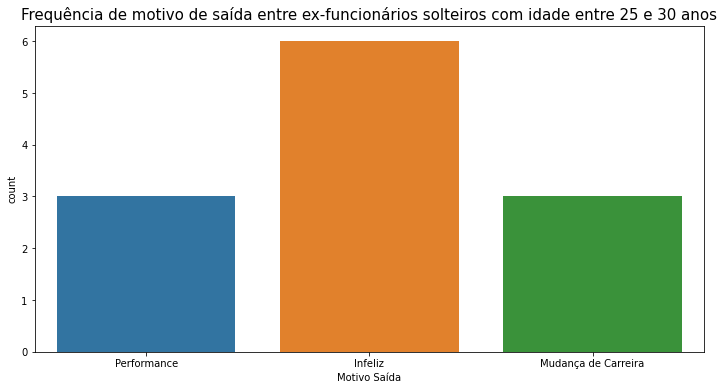

In [87]:
#Gerando gráfico de frequência de motivo de demissão de ex-funcionários solterios pertencentes à faixa etária 25-30
plt.figure(figsize=(12,6))
sns.countplot(demitido_df[demitido_df['Faixa Etária'] == '25-30'][demitido_df['Estado Civil'] == 'Solteiro']['Motivo Saída'])
plt.title('Frequência de motivo de saída entre ex-funcionários solteiros com idade entre 25 e 30 anos', fontsize=15);

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


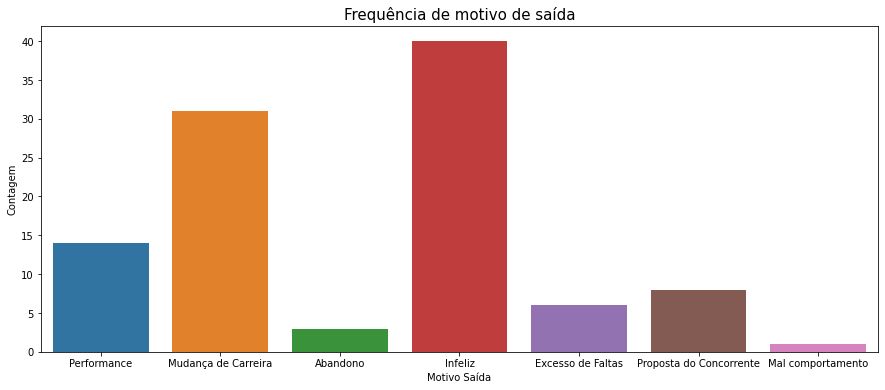

In [89]:
#Frequência de motivo de demissão
plt.figure(figsize=(15,6))
sns.countplot(demitido_df['Motivo Saída'])
plt.title('Frequência de motivo de saída', fontsize=15)
plt.ylabel('Contagem');

# Correlação e continuação de análise exploratória

In [72]:
#Gerando correlação
corr_matrix = info_df.corr()
corr_matrix

,Salário Mensal Corrigido,SpecialProjectsCount,idade
Salário Mensal Corrigido,1.000000,0.538697,0.023549
SpecialProjectsCount,0.538697,1.000000,-0.089448
idade,0.023549,-0.089448,1.000000


In [91]:
#Gerando dummies para análise
dummy_df0 = pd.get_dummies(info_df['Cargo'])
info_dummy_df0 = pd.concat([info_df, dummy_df0], axis=1)
dummy_df1 = pd.get_dummies(info_df['Faixa Etária'])
info_dummy_df1 = pd.concat([info_dummy_df0, dummy_df1], axis=1)
dummy_df2 = pd.get_dummies(info_df['Sexo'])
info_dummy_df2 = pd.concat([info_dummy_df1, dummy_df2], axis=1)
dummy_df3 = pd.get_dummies(info_df['Estado Civil'])
info_dummy_df3 = pd.concat([info_dummy_df2, dummy_df3], axis=1)
dummy_df4 = pd.get_dummies(info_df['Motivo Saída'])
info_dummy_df4 = pd.concat([info_dummy_df3, dummy_df4], axis=1)
dummy_df5 = pd.get_dummies(info_df['Departamento'])
info_dummy_df5 = pd.concat([info_dummy_df4, dummy_df5], axis=1)
dummy_df6 = pd.get_dummies(info_df['Fonte Recrutamento'])
info_dummy_df6 = pd.concat([info_dummy_df5, dummy_df6], axis=1)

In [92]:
#Resultado do data frame criado - Novas colunas
info_dummy_df6.columns

Index(['Salário Mensal Corrigido', 'Cargo', 'Data de Nascimento', 'Sexo',
       'Estado Civil', 'Motivo Saída', 'Departamento', 'Fonte Recrutamento',
       'SpecialProjectsCount', 'idade', 'Faixa Etária', 'Analista Comercial I',
       'Analista Comercial II', 'Analista Comercial III', 'Analista de BI I',
       'Analista de BI II', 'Analista de Dados I', 'Analista de Dados II',
       'Analista de Dados III', 'Analista de Suporte de TI',
       'Assistente Administrativo', 'Auxiliar de Suporte de TI', 'Contador I',
       'Contador II', 'Diretor Administrativo', 'Diretor Comercial',
       'Diretor de Produção', 'Diretor de TI', 'Engenheiro de Software',
       'Engenheiro de Software II', 'Gerente  de TI', 'Gerente Administrativo',
       'Gerente Comercial', 'Gerente de BI', 'Gerente de Eng. Software',
       'Gerente de Produção', 'Gerente de TI', 'Técnico de Produção I',
       'Técnico de Produção II', '18-25', '25-30', '30-35', '35-40', '40-45',
       '45-50', '50-55', '55-60

In [94]:
#Gerando coluna Tempo de Trabalho
info_dummy_df6['Tempo de Trabalho'] = 2019 - rh['Data de Contratação'].dt.year

In [95]:
#Conferindo sucesso da ação
info_dummy_df6.head()

,Salário Mensal Corrigido,Cargo,Data de Nascimento,Sexo,Estado Civil,Motivo Saída,Departamento,Fonte Recrutamento,SpecialProjectsCount,idade,...,Proposta do Concorrente,Administrativo,Produção,TI,Vendas,Feira de Contratação,Indicação Funcionários,Site da Empresa,Site de Vagas,Tempo de Trabalho
0,5060,Técnico de Produção I,1982-05-21,F,Solteiro,N/A - Empregado,Produção,Site da Empresa,0,37,...,0,0,1,0,0,0,0,1,0,4
1,3520,Técnico de Produção I,1975-12-21,M,Solteiro,N/A - Empregado,Produção,Indicação Funcionários,0,44,...,0,0,1,0,0,0,1,0,0,4
2,4400,Técnico de Produção I,1972-04-17,M,Casado(a),N/A - Empregado,Produção,Site de Vagas,0,47,...,0,0,1,0,0,0,0,0,1,2
3,3960,Técnico de Produção I,1994-10-17,M,Casado(a),N/A - Empregado,Produção,Site de Vagas,0,25,...,0,0,1,0,0,0,0,0,1,1
4,3520,Técnico de Produção I,1985-08-04,F,Solteiro,N/A - Empregado,Produção,Feira de Contratação,0,34,...,0,0,1,0,0,1,0,0,0,2


In [97]:
#Criando coluna de qualidade de tempo de trabalho
positivo = 0
negativo = 1
qualidade_tempo_trabalho = [] #Lista para receber ambos os valores
for tempo in info_dummy_df6['Tempo de Trabalho']:
    if tempo >= 2: #Tempo de trabalho igual ou acima de 2 anos é positivo (0)
        qualidade_tempo_trabalho.append(positivo)
    else: #Tempo de trabalho igual ou acima de 2 anos é negativo (1)
        qualidade_tempo_trabalho.append(negativo)

#Criando nova coluna para qualidade de tempo de trabalho
info_dummy_df6['Qualidade Tempo de Trabalho'] = qualidade_tempo_trabalho

In [119]:
#Conferindo criação
info_dummy_df6['Qualidade Tempo de Trabalho'].head()

0    0
1    0
2    0
3    1
4    0
Name: Qualidade Tempo de Trabalho, dtype: int64

In [120]:
#Conferindo estrutura de dados
info_dummy_df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 70 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Salário Mensal Corrigido     310 non-null    int64         
 1   Cargo                        310 non-null    object        
 2   Data de Nascimento           310 non-null    datetime64[ns]
 3   Sexo                         310 non-null    object        
 4   Estado Civil                 310 non-null    object        
 5   Motivo Saída                 310 non-null    object        
 6   Departamento                 310 non-null    object        
 7   Fonte Recrutamento           310 non-null    object        
 8   SpecialProjectsCount         310 non-null    int64         
 9   idade                        310 non-null    int64         
 10  Faixa Etária                 310 non-null    category      
 11  Analista Comercial I         310 non-null    

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


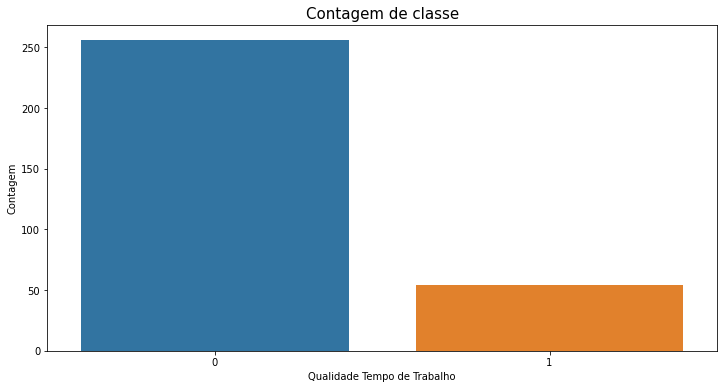

In [99]:
#Criando gráfico para contagem de classes
plt.figure(figsize=(12,6))
sns.countplot(info_dummy_df6['Qualidade Tempo de Trabalho'])
plt.title('Contagem de classe', fontsize=15)
plt.ylabel('Contagem');

In [100]:
#Criando correlação a partir do tempo de trabalho
corr_matrix_df = pd.DataFrame(info_dummy_df6.corr()['Tempo de Trabalho'])

In [101]:
#Buscando correlações igual ou acima de 50% (correlação positiva) entre tempo de trabalho e demais variáveis
corr_matrix_df[corr_matrix_df['Tempo de Trabalho'] >= 0.5]

,Tempo de Trabalho
Tempo de Trabalho,1.0


In [102]:
#Buscando correlações igual ou menor do que -20% (correlação negativa) entre tempo de trabalho e demais variáveis
corr_matrix_df[corr_matrix_df['Tempo de Trabalho'] <= -0.2]

,Tempo de Trabalho
SpecialProjectsCount,-0.309248
N/A - Empregado,-0.229621
TI,-0.302796
Qualidade Tempo de Trabalho,-0.628692


In [104]:
#Criando correlação após dummyzação
gen_corr_matrix_df = pd.DataFrame(info_dummy_df6.corr())

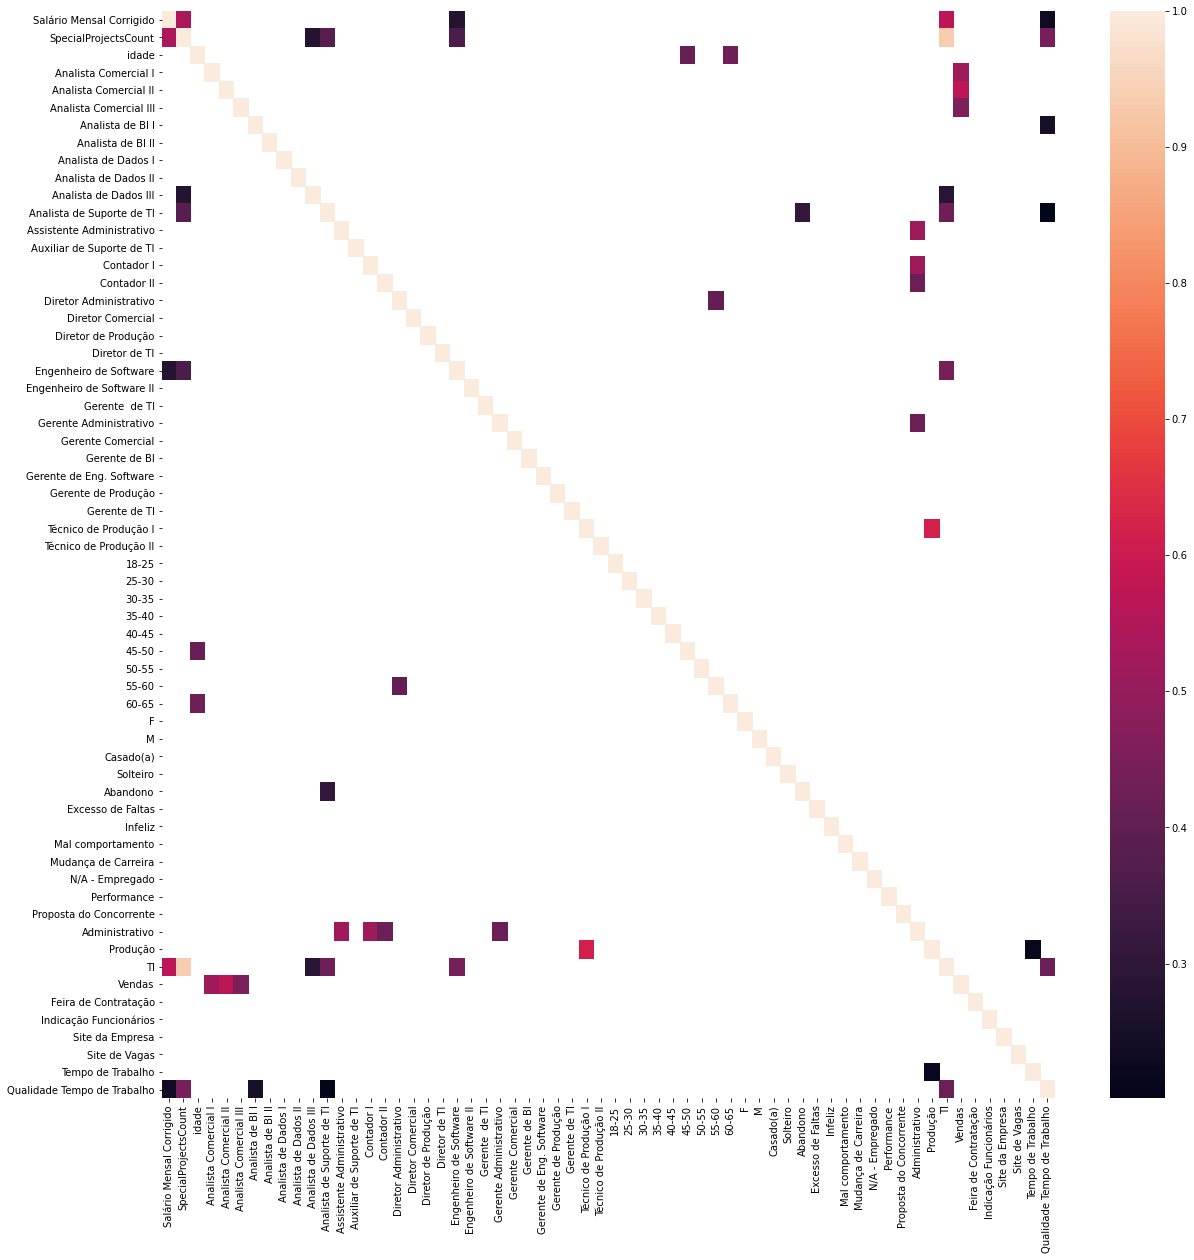

In [105]:
#Gerando gráfico heatmap para análise de correlação
plt.figure(figsize=(20,20))
sns.heatmap(gen_corr_matrix_df[gen_corr_matrix_df.corr() >= 0.5]); #Correlação positiva a partir de 50%

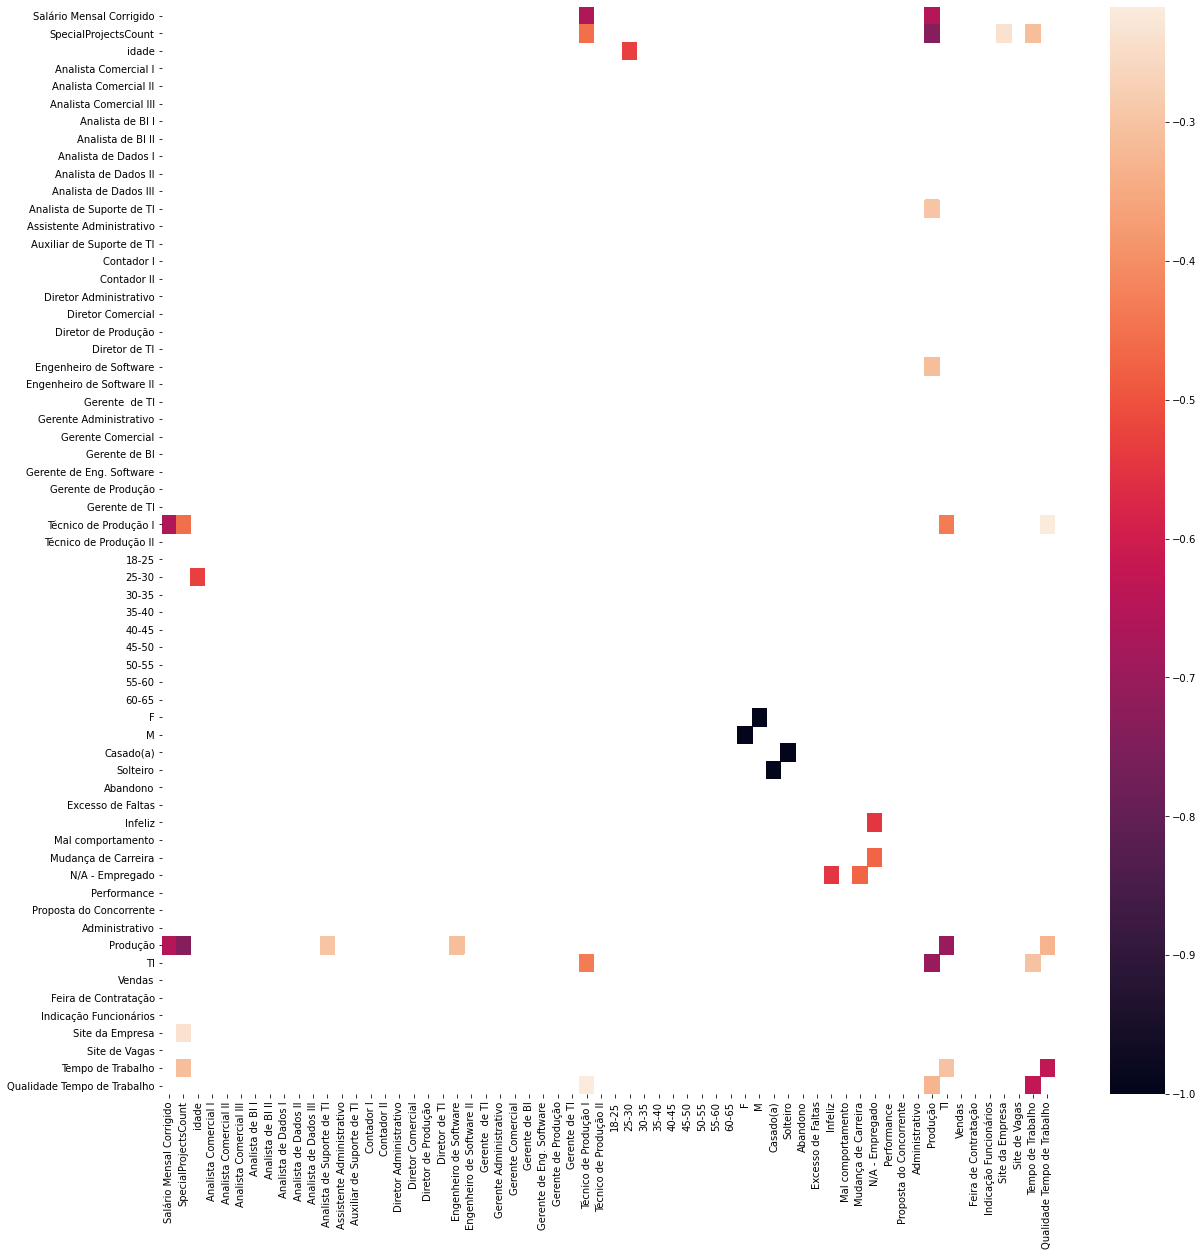

In [106]:
plt.figure(figsize=(20,20))
sns.heatmap(gen_corr_matrix_df[gen_corr_matrix_df.corr() <= -0.5]); #Correlação negativa igual ou menor do que 50%

In [111]:
#Chamando correlações positivas a partir de 40% - Variável Qualidade Tempo de Trabalho
gen_corr_matrix_df[gen_corr_matrix_df['Qualidade Tempo de Trabalho'] >= 0.4]['Qualidade Tempo de Trabalho']

SpecialProjectsCount           0.444335
TI                             0.420833
Qualidade Tempo de Trabalho    1.000000
Name: Qualidade Tempo de Trabalho, dtype: float64

In [115]:
#Chamando correlações negativas iguais ou menor do que 40% - Variável Qualidade Tempo de Trabalho
gen_corr_matrix_df[gen_corr_matrix_df['Qualidade Tempo de Trabalho'] <= -0.4]['Qualidade Tempo de Trabalho']

Tempo de Trabalho   -0.628692
Name: Qualidade Tempo de Trabalho, dtype: float64

# Pré-processamento

In [121]:
#Porcentagem de presença de cada classe concernente a qualidade de tempo de trabalho
classe_zero = len(info_dummy_df6[info_dummy_df6['Qualidade Tempo de Trabalho'] == 0])
classe_um= len(info_dummy_df6[info_dummy_df6['Qualidade Tempo de Trabalho'] == 1])
print('Há {}% da classe zero'.format(round(classe_zero/len(info_dummy_df6)*100, 2)))
print('Há {}% da classe um'.format(round(classe_um/len(info_dummy_df6)*100, 2)))

Há 82.58% da classe zero
Há 17.42% da classe um


In [326]:
#Conferindo total
len(info_dummy_df6)

310

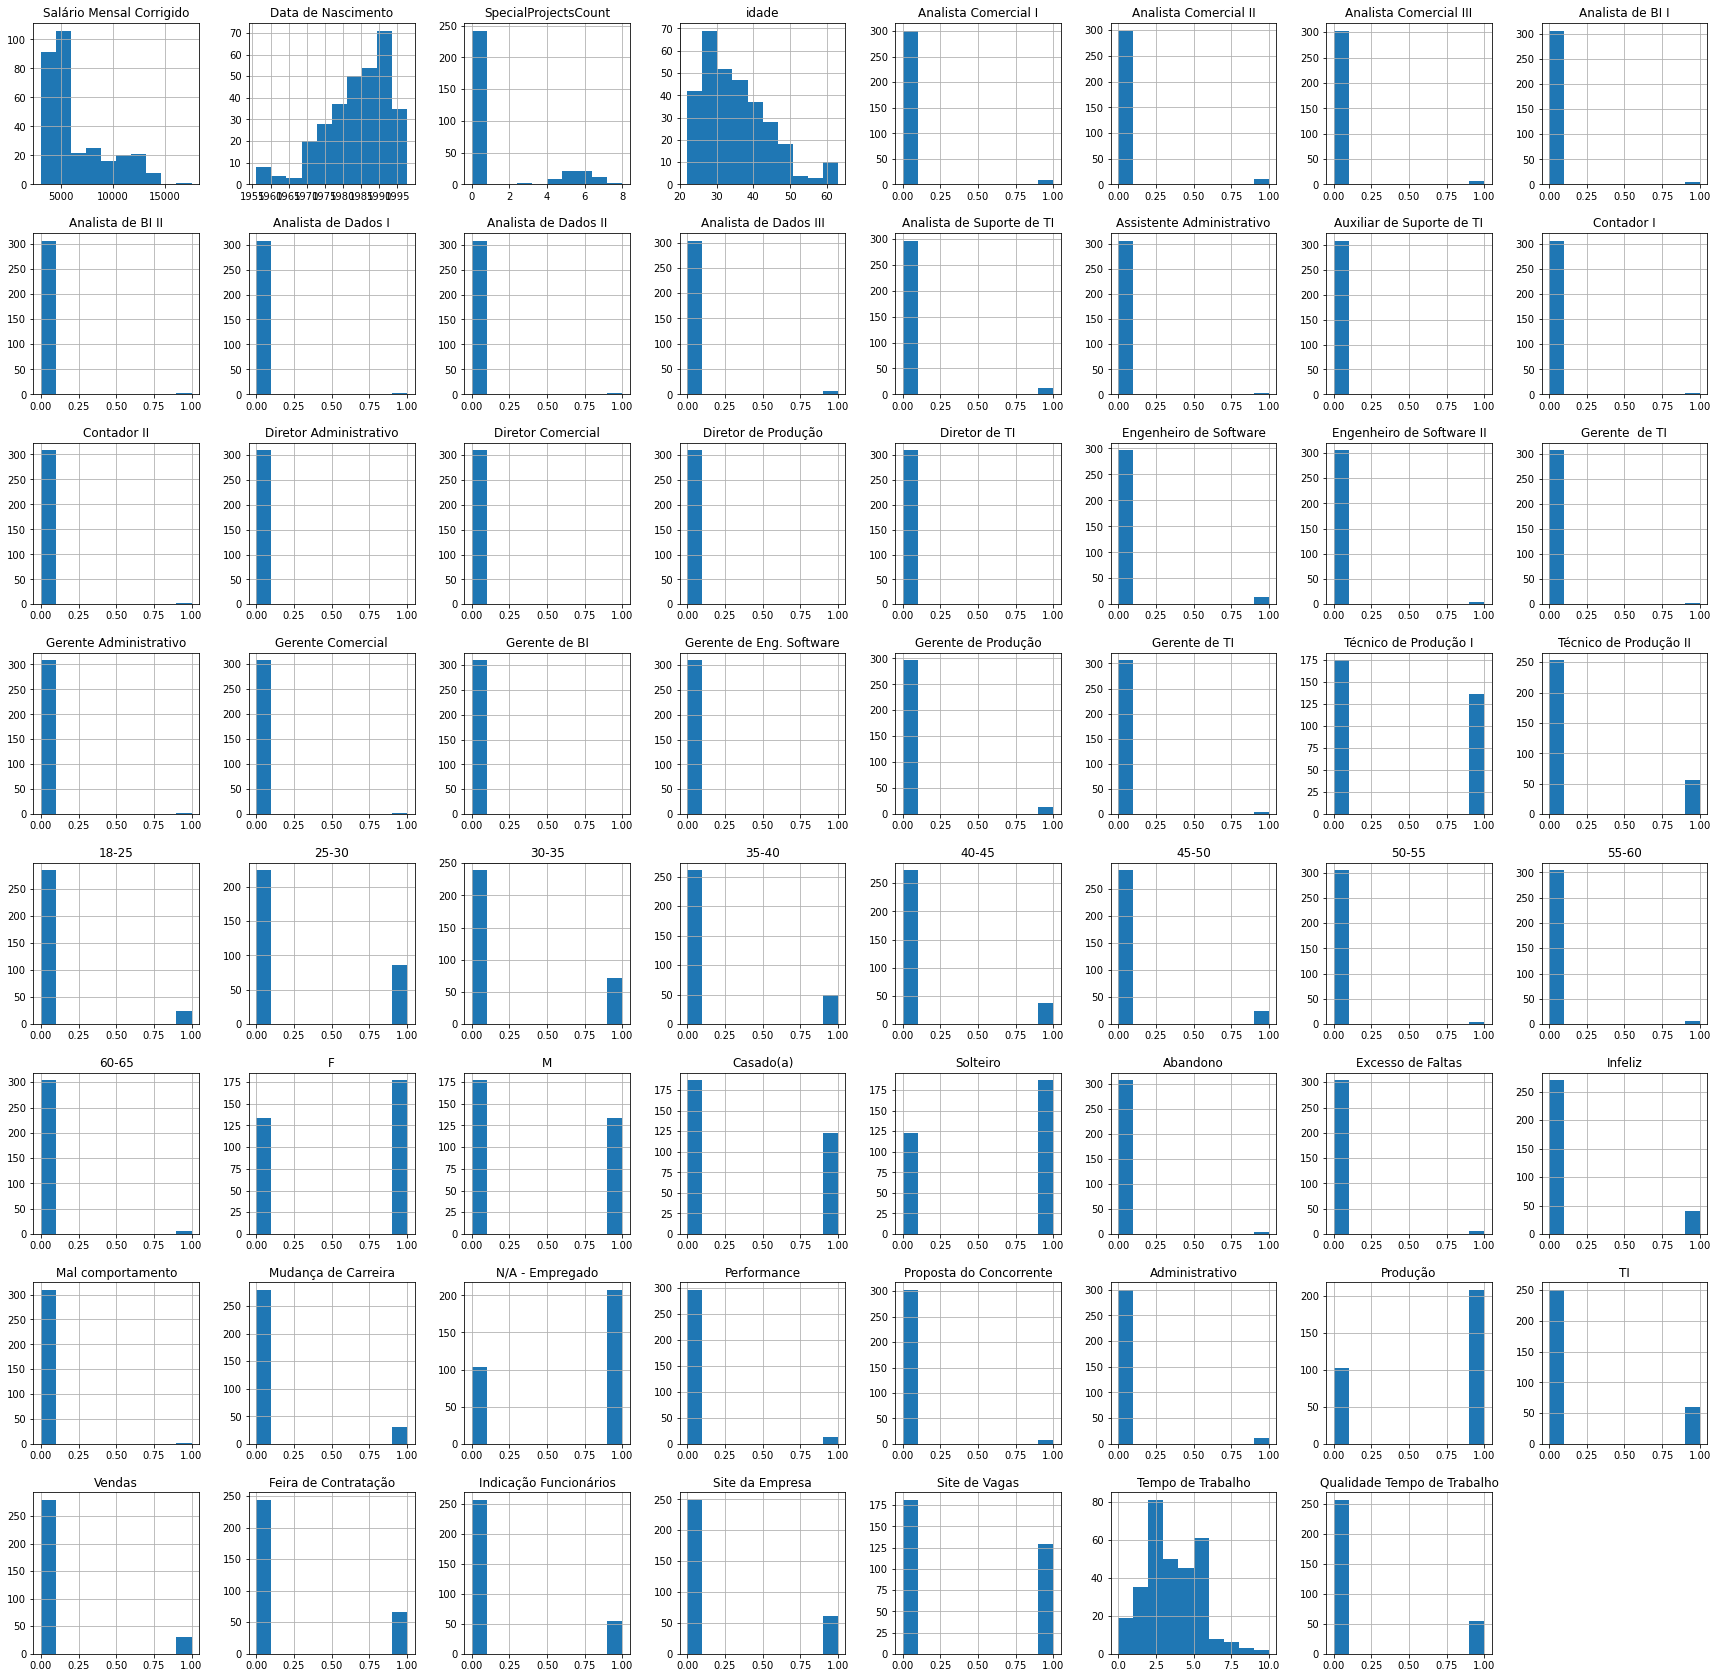

In [327]:
#Analisando distribuição
info_dummy_df6.hist(figsize=(30,30));

In [129]:
#Separando colunas para aplicação de one hot
categoricas_df = info_df.loc[:,['Cargo', 'Sexo', 'Estado Civil', 'Motivo Saída', 'Fonte Recrutamento',
                                 'Faixa Etária']]

#Visualizando
categoricas_df.head()

,Cargo,Sexo,Estado Civil,Motivo Saída,Fonte Recrutamento,Faixa Etária
0,Técnico de Produção I,F,Solteiro,N/A - Empregado,Site da Empresa,35-40
1,Técnico de Produção I,M,Solteiro,N/A - Empregado,Indicação Funcionários,40-45
2,Técnico de Produção I,M,Casado(a),N/A - Empregado,Site de Vagas,45-50
3,Técnico de Produção I,M,Casado(a),N/A - Empregado,Site de Vagas,18-25
4,Técnico de Produção I,F,Solteiro,N/A - Empregado,Feira de Contratação,30-35


In [137]:
#Tirando variáveis categóricas para restar somente as numéricas
numericas_df = info_df.drop(['Cargo', 'Sexo', 'Estado Civil', 'Motivo Saída', 'Fonte Recrutamento',
                         'Faixa Etária', 'Data de Nascimento', 'Departamento'], axis=1)

#Aplicando coluna Tempo de Trbalho
numericas_df['Tempo de Trabalho'] = info_dummy_df6['Tempo de Trabalho']

#Visualizando
numericas_df.head()

,Salário Mensal Corrigido,SpecialProjectsCount,idade,Tempo de Trabalho
0,5060,0,37,4
1,3520,0,44,4
2,4400,0,47,2
3,3960,0,25,1
4,3520,0,34,2


In [145]:
#Importando OneHotEncoder e StandardScaler
from sklearn.preprocessing import OneHotEncoder, StandardScaler

#Criação de objeto One Hot
onehot = OneHotEncoder(sparse=False)

#Criação do objeto Scaler
scaler = StandardScaler()

In [172]:
#Aplicando onehot
onehot_aplicado = onehot.fit_transform(categoricas_df)
onehot_aplicado

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [173]:
#Criando dataframe
onehot_aplicado_df = pd.DataFrame(onehot_aplicado)
onehot_aplicado_df

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [143]:
#Concatenando colunas numéricas com colunas onehots
final_df = pd.concat([numericas_df, onehot_aplicado_df],axis=1)
final_df.head()

,Salário Mensal Corrigido,SpecialProjectsCount,idade,Tempo de Trabalho,0,1,2,3,4,5,...,43,44,45,46,47,48,49,50,51,52
0,5060,0,37,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,3520,0,44,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,4400,0,47,2,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,3960,0,25,1,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3520,0,34,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [146]:
#Padronizando os dados
final_escalonado_df = scaler.fit_transform(final_df)
final_escalonado_df = pd.DataFrame(final_escalonado_df)
final_escalonado_df

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,-0.463675,-0.515148,0.176336,0.492673,-0.172917,-0.191805,-0.151994,-0.114332,-0.098853,-0.080582,...,-0.844220,-0.296174,-0.619620,-0.545042,2.307928,-0.368146,-0.296174,-0.128037,-0.140488,-0.140488
1,-0.978591,-0.515148,0.966932,0.492673,-0.172917,-0.191805,-0.151994,-0.114332,-0.098853,-0.080582,...,-0.844220,-0.296174,-0.619620,-0.545042,-0.433289,2.716317,-0.296174,-0.128037,-0.140488,-0.140488
2,-0.684354,-0.515148,1.305759,-0.618080,-0.172917,-0.191805,-0.151994,-0.114332,-0.098853,-0.080582,...,1.184526,-0.296174,-0.619620,-0.545042,-0.433289,-0.368146,3.376389,-0.128037,-0.140488,-0.140488
3,-0.831472,-0.515148,-1.178972,-1.173456,-0.172917,-0.191805,-0.151994,-0.114332,-0.098853,-0.080582,...,1.184526,3.376389,-0.619620,-0.545042,-0.433289,-0.368146,-0.296174,-0.128037,-0.140488,-0.140488
4,-0.978591,-0.515148,-0.162491,-0.618080,-0.172917,-0.191805,-0.151994,-0.114332,-0.098853,-0.080582,...,-0.844220,-0.296174,-0.619620,1.834720,-0.433289,-0.368146,-0.296174,-0.128037,-0.140488,-0.140488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,-0.095879,-0.515148,-0.614261,-0.618080,-0.172917,-0.191805,-0.151994,-0.114332,-0.098853,-0.080582,...,1.184526,-0.296174,1.613893,-0.545042,-0.433289,-0.368146,-0.296174,-0.128037,-0.140488,-0.140488
306,-0.390116,-0.515148,0.289278,-0.062704,-0.172917,-0.191805,-0.151994,-0.114332,-0.098853,-0.080582,...,-0.844220,-0.296174,-0.619620,-0.545042,2.307928,-0.368146,-0.296174,-0.128037,-0.140488,-0.140488
307,-0.463675,-0.515148,-0.953088,2.158802,-0.172917,-0.191805,-0.151994,-0.114332,-0.098853,-0.080582,...,1.184526,-0.296174,1.613893,-0.545042,-0.433289,-0.368146,-0.296174,-0.128037,-0.140488,-0.140488
308,-0.316557,-0.515148,2.999895,0.492673,-0.172917,-0.191805,-0.151994,-0.114332,-0.098853,-0.080582,...,1.184526,-0.296174,-0.619620,-0.545042,-0.433289,-0.368146,-0.296174,-0.128037,-0.140488,7.118052


# Machine Learning
Get_Dummy

In [150]:
#Separando as variáveis preditoras
X_all_get_dummy = final_escalonado_df.values
X_all_get_dummy

array([[-0.46367542, -0.51514829,  0.17633581, ..., -0.12803688,
        -0.14048787, -0.14048787],
       [-0.97859111, -0.51514829,  0.9669323 , ..., -0.12803688,
        -0.14048787, -0.14048787],
       [-0.68435357, -0.51514829,  1.30575936, ..., -0.12803688,
        -0.14048787, -0.14048787],
       ...,
       [-0.46367542, -0.51514829, -0.95308775, ..., -0.12803688,
        -0.14048787, -0.14048787],
       [-0.31655666, -0.51514829,  2.99989469, ..., -0.12803688,
        -0.14048787,  7.11805217],
       [-0.46367542, -0.51514829,  0.40222052, ..., -0.12803688,
        -0.14048787, -0.14048787]])

In [151]:
#Separando a variável target
y = info_dummy_df6['Qualidade Tempo de Trabalho']
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Qualidade Tempo de Trabalho, dtype: int64

In [894]:
#Analisando 
X_all_get_dummy.shape

(310, 57)

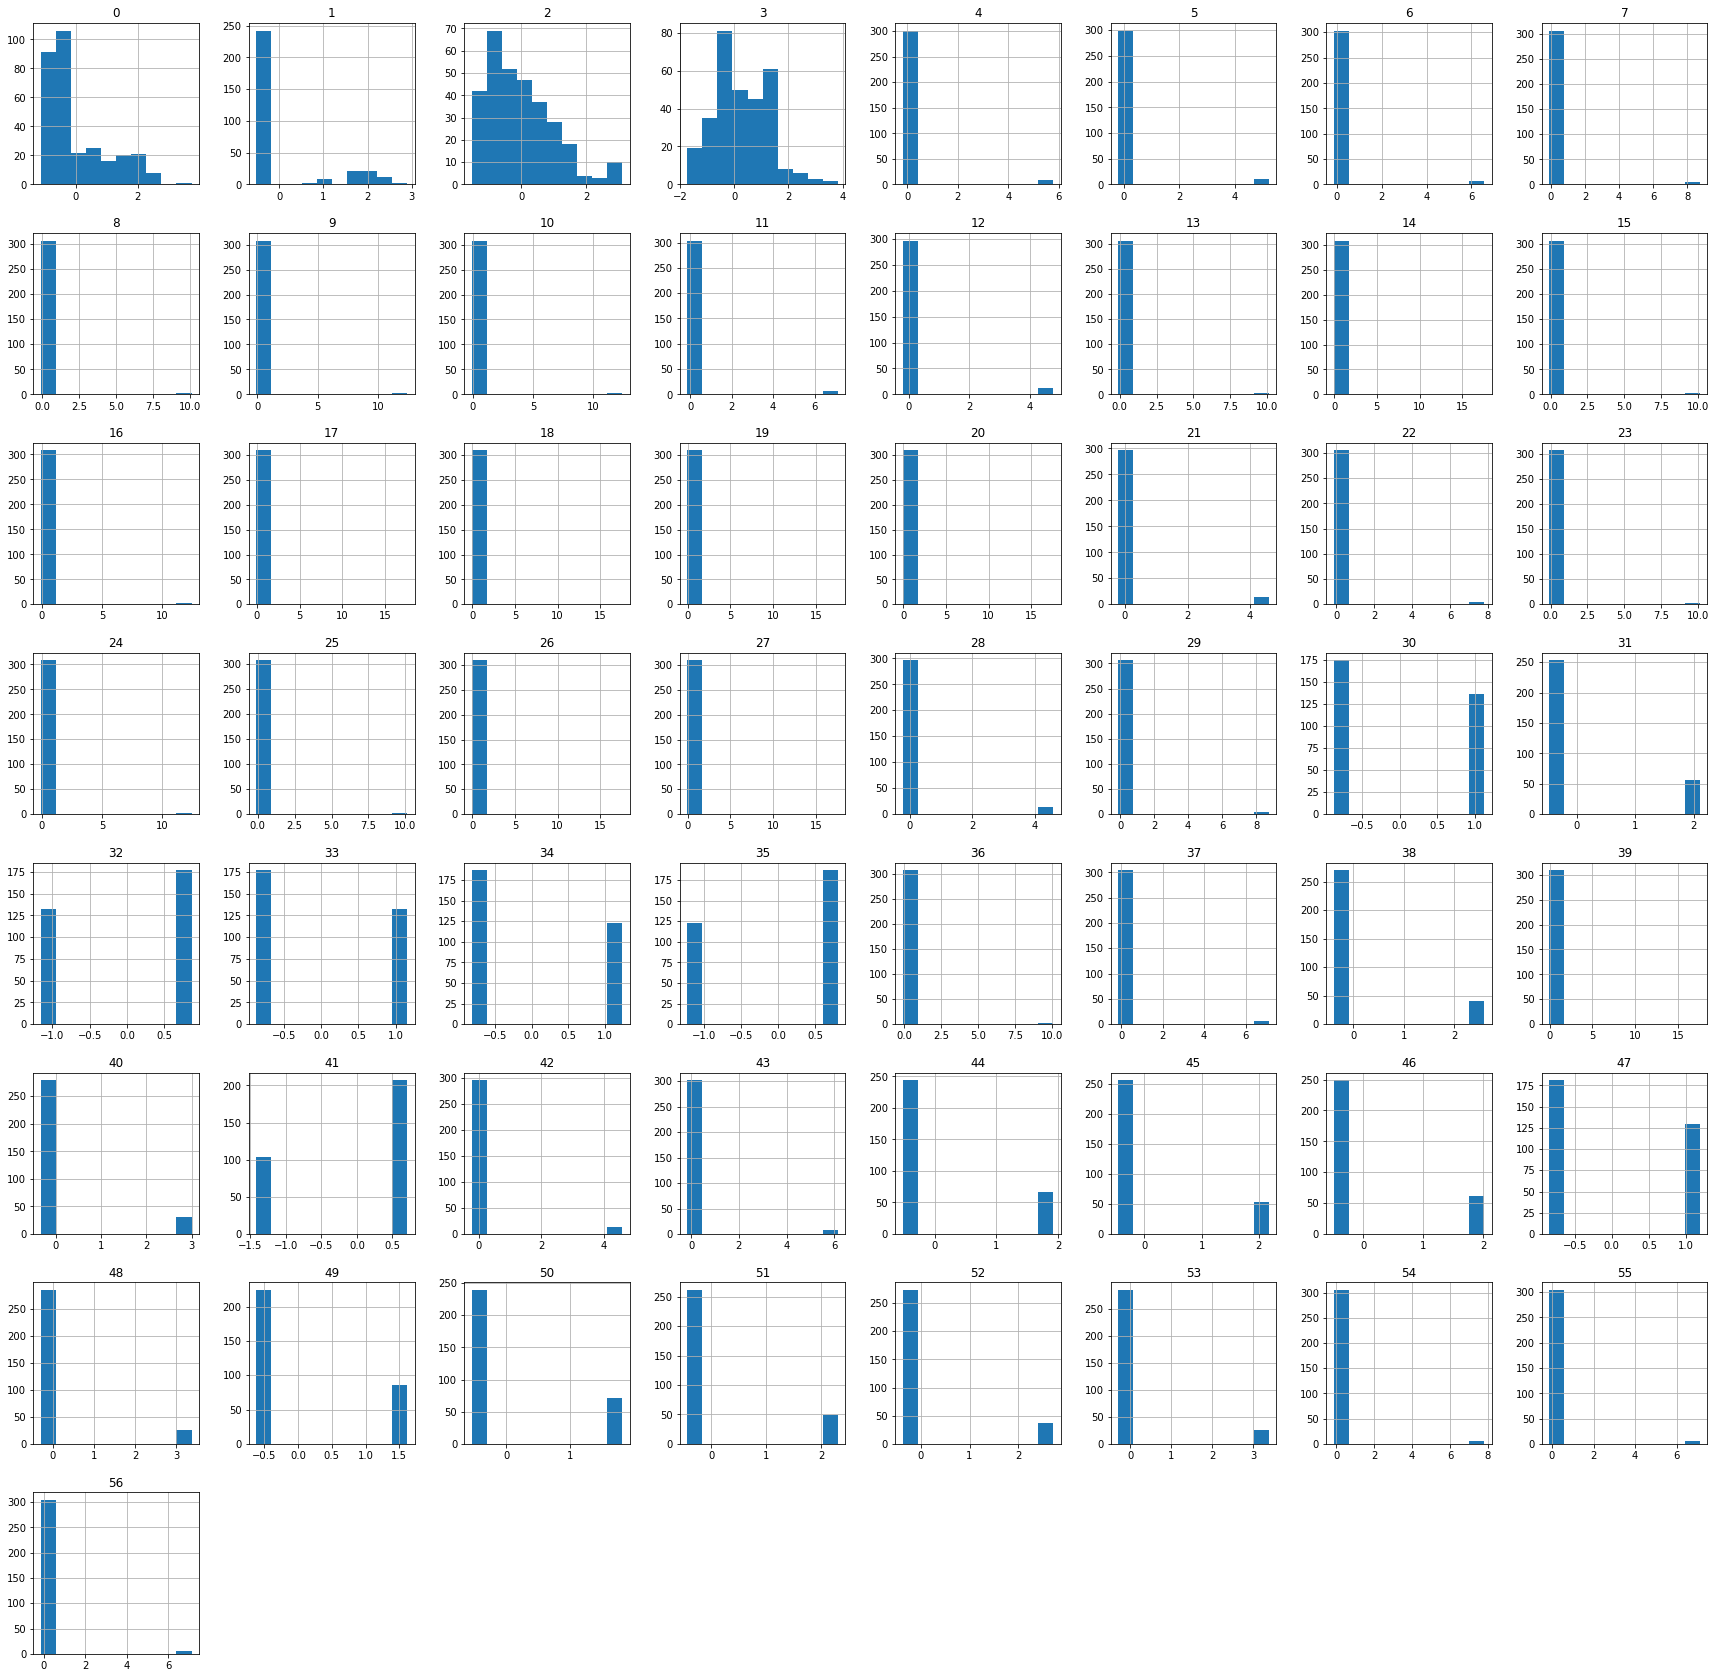

In [152]:
#Gráfico dos dados escalados
df = pd.DataFrame(X_all_get_dummy) #transformando array de variáveis preditoras em dataframe

#Gerando histograma
df.hist(figsize=(30,30)); #Visualizando escalonamento

In [898]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,-0.463675,-0.515148,0.176336,0.492673,-0.172917,-0.191805,-0.151994,-0.114332,-0.098853,-0.080582,...,-0.844220,-0.296174,-0.619620,-0.545042,2.307928,-0.368146,-0.296174,-0.128037,-0.140488,-0.140488
1,-0.978591,-0.515148,0.966932,0.492673,-0.172917,-0.191805,-0.151994,-0.114332,-0.098853,-0.080582,...,-0.844220,-0.296174,-0.619620,-0.545042,-0.433289,2.716317,-0.296174,-0.128037,-0.140488,-0.140488
2,-0.684354,-0.515148,1.305759,-0.618080,-0.172917,-0.191805,-0.151994,-0.114332,-0.098853,-0.080582,...,1.184526,-0.296174,-0.619620,-0.545042,-0.433289,-0.368146,3.376389,-0.128037,-0.140488,-0.140488
3,-0.831472,-0.515148,-1.178972,-1.173456,-0.172917,-0.191805,-0.151994,-0.114332,-0.098853,-0.080582,...,1.184526,3.376389,-0.619620,-0.545042,-0.433289,-0.368146,-0.296174,-0.128037,-0.140488,-0.140488
4,-0.978591,-0.515148,-0.162491,-0.618080,-0.172917,-0.191805,-0.151994,-0.114332,-0.098853,-0.080582,...,-0.844220,-0.296174,-0.619620,1.834720,-0.433289,-0.368146,-0.296174,-0.128037,-0.140488,-0.140488
5,-0.684354,-0.515148,0.515163,-0.618080,-0.172917,-0.191805,-0.151994,-0.114332,-0.098853,-0.080582,...,1.184526,-0.296174,-0.619620,-0.545042,2.307928,-0.368146,-0.296174,-0.128037,-0.140488,-0.140488
6,-1.052150,-0.515148,-0.727203,-0.062704,-0.172917,-0.191805,-0.151994,-0.114332,-0.098853,-0.080582,...,1.184526,-0.296174,1.613893,-0.545042,-0.433289,-0.368146,-0.296174,-0.128037,-0.140488,-0.140488
7,-0.978591,-0.515148,-1.178972,-0.618080,-0.172917,-0.191805,-0.151994,-0.114332,-0.098853,-0.080582,...,-0.844220,3.376389,-0.619620,-0.545042,-0.433289,-0.368146,-0.296174,-0.128037,-0.140488,-0.140488
8,-0.334947,-0.515148,-0.162491,-1.728833,-0.172917,-0.191805,-0.151994,-0.114332,-0.098853,-0.080582,...,-0.844220,-0.296174,-0.619620,1.834720,-0.433289,-0.368146,-0.296174,-0.128037,-0.140488,-0.140488
9,-0.537235,-0.515148,0.063393,-0.062704,-0.172917,-0.191805,-0.151994,-0.114332,-0.098853,-0.080582,...,1.184526,-0.296174,-0.619620,-0.545042,2.307928,-0.368146,-0.296174,-0.128037,-0.140488,-0.140488


In [899]:
y

0      0
1      0
2      0
3      1
4      0
      ..
305    0
306    0
307    0
308    0
309    0
Name: Qualidade Tempo de Trabalho, Length: 310, dtype: int64

In [153]:
#Importando modelo de seleção para treinamento e teste
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X_all_get_dummy, y, test_size=0.2, random_state=1)

In [154]:
#Analisando repartição
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((248, 57), (62, 57), (248,), (62,))

In [155]:
y_train

307    0
0      0
132    0
208    0
62     0
      ..
203    0
255    0
72     0
235    0
37     0
Name: Qualidade Tempo de Trabalho, Length: 248, dtype: int64

In [156]:
#Averiguando percentual de distribuição
print('Percentual de dados da base de treinamento é {} %'.format((248/(248 + 62)*100)))
print('Percentual de dados da base de teste é {} %'.format((62/(248 + 62)*100)))

Percentual de dados da base de treinamento é 80.0 %
Percentual de dados da base de teste é 20.0 %


In [157]:
#Importando modelo linear logístico
from sklearn.linear_model import LogisticRegression
logistic_0 = LogisticRegression(random_state=1)
logistic_model_0 = logistic_0.fit(X_train, y_train)

In [158]:
#Prevendo
pred_logistic_0 = logistic_model_0.predict(X_test)

In [159]:
#Resultados de predição
pred_logistic_0

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [160]:
#Valores reais
y_test = np.array(y_test)
y_test.reshape(1,-1)

array([[1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]],
      dtype=int64)

In [161]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(pred_logistic_0, y_test))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        48
           1       0.92      0.79      0.85        14

    accuracy                           0.94        62
   macro avg       0.93      0.88      0.90        62
weighted avg       0.93      0.94      0.93        62



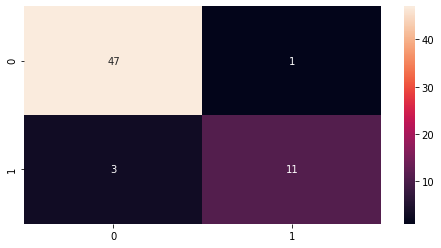

In [162]:
#Criando matriz de confusão
cm_logistic_0 = confusion_matrix(pred_logistic_0, y_test)

#Gerando gráfico heatmap
plt.figure(figsize=(8,4))
sns.heatmap(cm_logistic_0, annot=True);

In [163]:
print('Quando o modelo previu que o funcionário estaria ao menos dois anos, ele acertou {}%'.format(round((47/(47+1)),4)*100))
print('Quando o modelo previu que o funcionário estaria ao menos dois anos, ele errou {}%'.format(round((1/(47+1)),4)*100))
print('Quando o modelo previu que o funcionário ficaria menos de dois anos, ele errou {}%'.format(round((3/(11+3)),4)*100))

Quando o modelo previu que o funcionário estaria ao menos dois anos, ele acertou 97.92%
Quando o modelo previu que o funcionário estaria ao menos dois anos, ele errou 2.08%
Quando o modelo previu que o funcionário ficaria menos de dois anos, ele errou 21.43%


# II Rodada de Machine Learning: Balanceamento dos dados

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


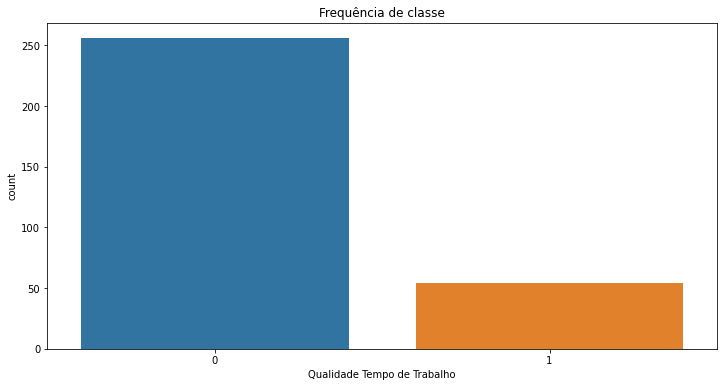

In [164]:
#analyzing data balancing
plt.figure(figsize=(12,6))
sns.countplot(info_dummy_df6['Qualidade Tempo de Trabalho'])
plt.title('Frequência de classe');

In [166]:
#Balanceando os dados
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_smt, y_smt =  smt.fit_resample(X_all_get_dummy, y)

In [168]:
X_all_get_dummy.shape

(310, 57)

In [912]:
#Baste de dados atualmente
X_smt.shape, y_smt.shape

((512, 57), (512,))

In [169]:
#Base de dados anteriormente
X_all_get_dummy.shape, y.shape

((310, 57), (310,))

In [914]:
#Resultado de aumento
print('Houve um aumento de amostras (sintéticas) em torno de {}%'.format(round(((512*100)/310)-100,2)))

Houve um aumento de amostras (sintéticas) em torno de 65.16%


C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


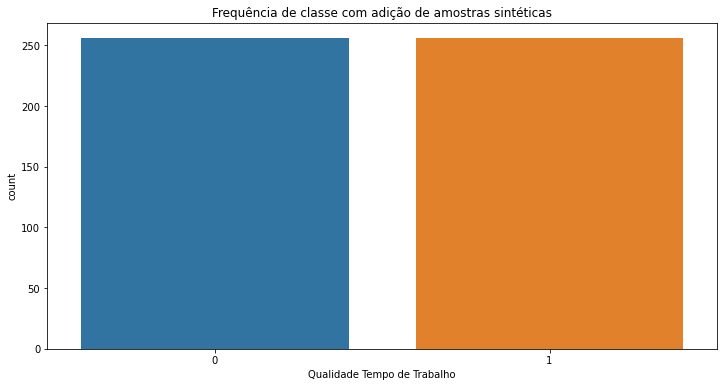

In [915]:
#analyzing data balancing
plt.figure(figsize=(12,6))
sns.countplot(y_smt)
plt.title('Frequência de classe com adição de amostras sintéticas');

In [916]:
#Separando os dados em treinamento e teste
x_smt_train, x_smt_test, y_smt_train, y_smt_test = tts(X_smt, y_smt, test_size=0.2, random_state=2)
x_smt_train.shape, x_smt_test.shape, y_smt_train.shape, y_smt_test.shape

((409, 57), (103, 57), (409,), (103,))

In [917]:
#Repartição anterior
print('Base para treinamento: {}%'.format(round((409/(409+103))*100,2)))
print('Base para teste: {}%'.format(round((103/(409+103))*100,2)))

Base para treinamento: 79.88%
Base para teste: 20.12%


In [918]:
#Treinando o modelo
logistic_smt = LogisticRegression(random_state=1)
logistic_model_smt = logistic_smt.fit(x_smt_train, y_smt_train)

In [919]:
#Prevendo
pred_logistic_smt = logistic_model_smt.predict(x_smt_test)

In [920]:
#Desempenho do modelo
print(classification_report(pred_logistic_smt, y_smt_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        55
           1       1.00      0.98      0.99        48

    accuracy                           0.99       103
   macro avg       0.99      0.99      0.99       103
weighted avg       0.99      0.99      0.99       103



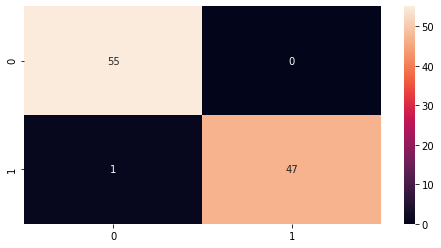

In [921]:
#Gerando matriz de confusão
cm_logistic_smt = confusion_matrix(pred_logistic_smt, y_smt_test)

#Gerando heatmap de matriz de confusão
plt.figure(figsize=(8,4))
sns.heatmap(cm_logistic_smt, annot=True);

In [922]:
print('Quando o modelo perviu que o funcionário ficaria ao menos 2 anos, ele acertou em {}%'.format(round((55/(55+0))*100,2)))
print('Quando o modelo previu que o funcionário ficaria menos de 2 anos, ele acertou em {}%'.format(round(0/(55+0)*100,2)))
print('Quando o modelo previu que o funcionário ficaria menos de 2 anos, ele errou em {}%'.format(round(1/(47+1)*100,2)))

Quando o modelo perviu que o funcionário ficaria ao menos 2 anos, ele acertou em 100.0%
Quando o modelo previu que o funcionário ficaria menos de 2 anos, ele acertou em 0.0%
Quando o modelo previu que o funcionário ficaria menos de 2 anos, ele errou em 2.08%


# III Rodada de machine learning: undersampling

In [170]:
from imblearn.under_sampling import TomekLinks as tomek
tomek = tomek()
X_tomek, y_tomek = tomek.fit_resample(X_all_get_dummy, y)

In [171]:
#Resultado
X_tomek.shape, y_tomek.shape

((291, 57), (291,))

In [925]:
#Anteriormente
X_all_get_dummy.shape, y.shape

((310, 57), (310,))

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


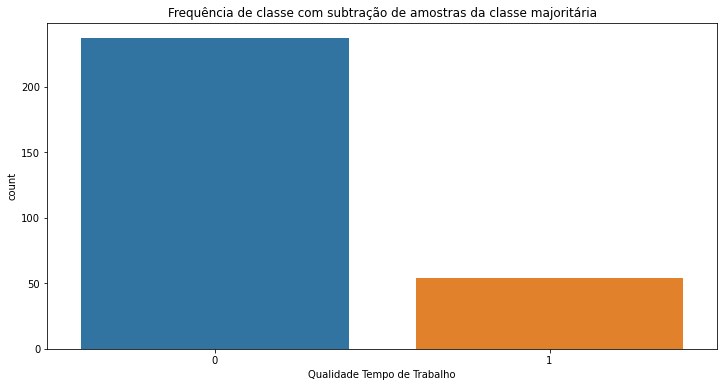

In [926]:
#Frequência de cada classe a partir da técnica de undersampling
plt.figure(figsize=(12,6))
sns.countplot(y_tomek)
plt.title('Frequência de classe com subtração de amostras da classe majoritária');

In [927]:
#Dividindo em treinamento e teste
x_tomek_train, x_tomek_test, y_tomek_train, y_tomek_test = tts(X_tomek, y_tomek, test_size=0.2, random_state=30)
x_tomek_train.shape, x_tomek_test.shape, y_tomek_train.shape, y_tomek_test.shape

((232, 57), (59, 57), (232,), (59,))

In [928]:
#Treinando o modelo
from sklearn.linear_model import LogisticRegression
logistic_tomek = LogisticRegression(random_state=1)
logistic_model_tomek = logistic_tomek.fit(x_tomek_train, y_tomek_train)

In [929]:
#Prevendo
pred_logistic_tomek = logistic_model_tomek.predict(x_tomek_test)

In [930]:
#Resultados
print(classification_report(pred_logistic_tomek, y_tomek_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00         9

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



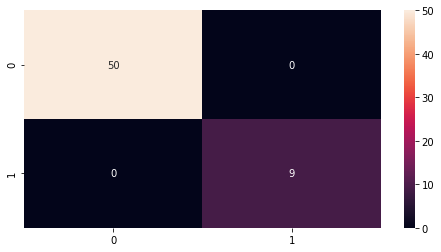

In [931]:
#Matriz de confusão
cm_logistic_tomek = confusion_matrix(pred_logistic_tomek, y_tomek_test)

#Gerando gráfico heatmap
plt.figure(figsize=(8,4))
sns.heatmap(cm_logistic_tomek, annot=True);

In [932]:
print('Quando o modelo previu que o funcionário ficaria ao menos dois anos, ele acertou em torno de {}%'.format(round(50/(50+0)*100,2)))
print('Quando o modelo previu que o funcionário ficaria menos de dois anos, ele acertou em torno de {}%'.format(round(0/(0+9)*100,2)))

Quando o modelo previu que o funcionário ficaria ao menos dois anos, ele acertou em torno de 100.0%
Quando o modelo previu que o funcionário ficaria menos de dois anos, ele acertou em torno de 0.0%


# Entregando o modelo

In [174]:
#Importando o pickle para persistir o modelo
import pickle

In [933]:
#Salvando o modelo
with open('selecao_candidato.pkl', 'wb') as f:
    pickle.dump([scaler, onehot, logistic_model_tomek], f)

# Testando modelo com dados criados

In [178]:
#Abrindo o modelo
with open('selecao_candidato.pkl', 'rb') as f:
    scaler, onehot, logistic_model_tomek = pickle.load(f)

In [179]:
scaler, onehot, logistic_model_tomek

(StandardScaler(),
 OneHotEncoder(sparse=False),
 LogisticRegression(random_state=1))

In [180]:
#Variáveis categóricas
categoricos = [['Diretor Administrativo', 'F', 'Casado(a)', 'Mudança de Carreira', 'Site da Empresa', '25-30']]
categoricos_df = pd.DataFrame(categoricos)
categoricos_df

,0,1,2,3,4,5
0,Diretor Administrativo,F,Casado(a),Mudança de Carreira,Site da Empresa,25-30


In [181]:
#Conversão e criação de dataframe com valores convertidos
X_categoricos = onehot.transform(categoricos_df)
X_categoricos_df = pd.DataFrame(X_categoricos)
X_categoricos_df

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [184]:
#Variáveis numéricas
numericos = {'Salário Mensal':[1200], 'projetos':[3], 'idade':[25], 'tempo_empresa':[1]}
numericos_df = pd.DataFrame(numericos)
numericos_df

,Salário Mensal,projetos,idade,tempo_empresa
0,1200,3,25,1


In [189]:
#Concatenando tipos de variáveis
candidato = pd.concat([X_categoricos_df, numericos_df], axis=1)
candidato

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,Salário Mensal,projetos,idade,tempo_empresa
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1200,3,25,1


In [193]:
candidato_padronizado = scaler.transform(candidato)
candidato_padronizado.shape

(1, 57)

In [199]:
#Resultado
resultado = logistic_model_tomek.predict(candidato_padronizado)
if resultado == 0:
    print('Candidato está classificado para a próxima fase: ', resultado)
else:
    print('Candidato não está classificado para a próxima fase: ', resultado)

Candidato está classificado para a próxima fase:  [0]
